In [1]:
import numpy as np
import gym
import matplotlib.pyplot as plt
import vizdoomgym

import dataset #my file
import vae #my file
import lstm #my file
import parameters #my file
import lstm_doom_env #my file

from PIL import Image 

/home/luca/anaconda3/envs/drl/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/luca/anaconda3/envs/drl/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/luca/anaconda3/envs/drl/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/luca/anaconda3/envs/drl/lib/python3.6/site-packages/ten

Instructions for updating:
non-resource variables are not supported in the long term


/home/luca/anaconda3/envs/drl/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/luca/anaconda3/envs/drl/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/luca/anaconda3/envs/drl/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/luca/anaconda3/envs/drl/lib/python

In [2]:
# Init
env = gym.make('VizdoomTakeCover-v0')
obs = env.reset()
#info_env = get_info_from_env(env)
dataset = dataset.Dataset(env) 
vae = vae.VAE(dataset)
vae.load_json()
#print("Creating dataset!")

print("Loading dataset!")
dataset.load_dataset(complete=True)

lstm = lstm.LSTM()
lstm.load_json()

learned_env = lstm_doom_env.DOOM_LSTM_ENV(vae)

Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use keras.layers.dense instead.


Instructions for updating:
Use `tf.keras.layers.Conv2DTranspose` instead.
Model loaded!
Loading dataset!
len(self.encoded_frame_dataset):  5000
Frames Dataset size:  (5000, 64, 64, 3)
Encoded Frame Dataset size:  (5000, 64)
Action Dataset size:  (5000,)
Reset Dataset size:  (5000,)
Lstm Batch Size :  10
Num batches:  1
Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Session Started!
<tf.Variable 'lstm_unroll/lstm_cell/kernel:0' shape=(1090, 4096) dtype=float32_ref>
<tf.Variable 'lstm_unroll/lstm_cell/bias:0' shape=(4096,) dtype=float32_ref>
<tf.Variable 'lstm_activation_function/rnn_output_w:0' shape=(1024, 961) dtype=float32_ref>
<tf.Variable 'lstm_activation_function/rnn_output_b:0' shape=(961,) dtype=float32_ref>
Model loaded!
Session Started!
<tf.Variable 'lstm_unroll/lstm_cell/kernel:0' shape=(1090, 4096) dtype=float32_ref>
<tf.Variable 'lstm_unroll/lstm_cell/bias:0' shape=(4096,) dtype=float32_ref>
<tf.Variable 'lstm_activation_function/rnn_output_w:0' shape=(1024, 961) dtype=float32_ref>
<tf.Variable 'lstm_activation_function/rnn_output_b:0' shape=(961,) dtype=float32_ref>
Model loaded!


In [3]:
print("dataset_size: ",dataset.dataset_size)
print("chunck_size: ",dataset.chunck_size)
print("lstm_batch_size: ",dataset.lstm_batch_size)
print("num_batches: ",(dataset.dataset_size/dataset.chunck_size)/dataset.lstm_batch_size)

dataset_size:  5000
chunck_size:  500
lstm_batch_size:  10
num_batches:  1.0


In [4]:
#get batches from dataset 
batch_encoded_frames,batch_actions,batch_reset = dataset.split_dataset_into_batches()

In [5]:
batch_encoded_frames.shape

(1, 10, 500, 64)

VERA SEQUENZA
image:  1 done:  0 new action 0


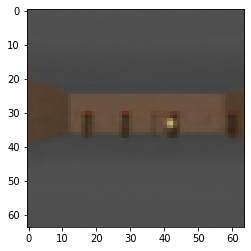

image:  2 done:  0 new action 1


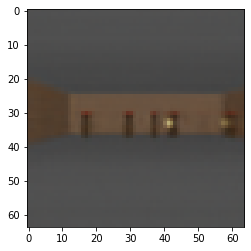

image:  3 done:  0 new action 1


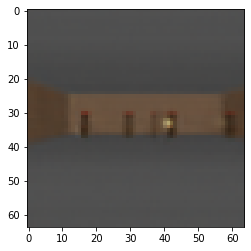

image:  4 done:  0 new action 0


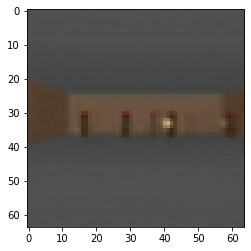

image:  5 done:  0 new action 0


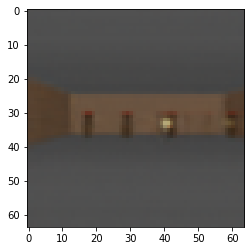

image:  6 done:  0 new action 0


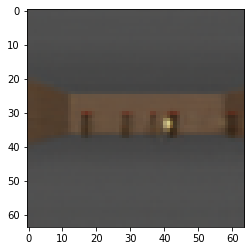

image:  7 done:  0 new action 1


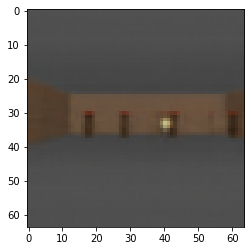

image:  8 done:  0 new action 0


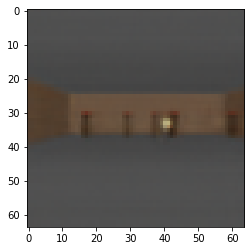

image:  9 done:  0 new action 1


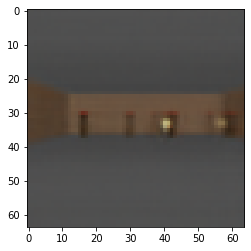

image:  10 done:  0 new action 0


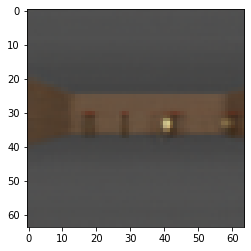

image:  11 done:  0 new action 1


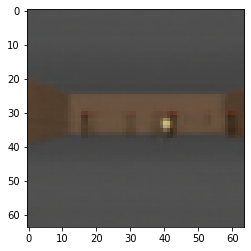

image:  12 done:  0 new action 1


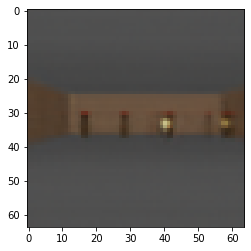

image:  13 done:  0 new action 0


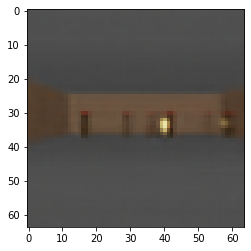

image:  14 done:  0 new action 1


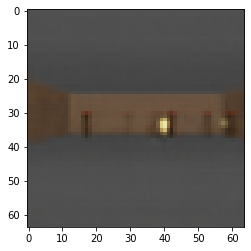

image:  15 done:  0 new action 0


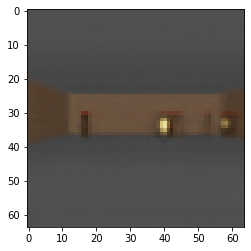

image:  16 done:  0 new action 1


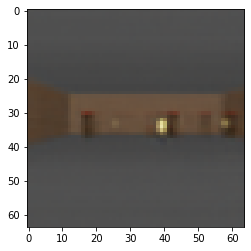

image:  17 done:  0 new action 1


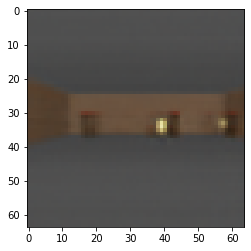

image:  18 done:  0 new action 0


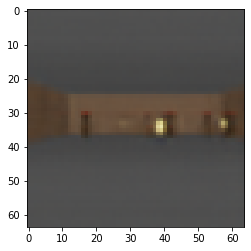

image:  19 done:  0 new action 0


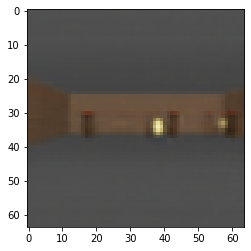

image:  20 done:  0 new action 0


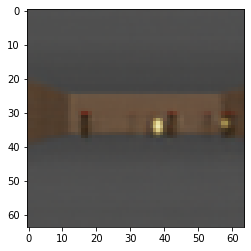

image:  21 done:  0 new action 0


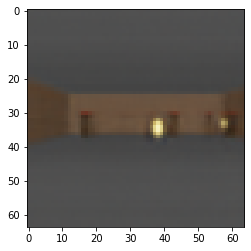

image:  22 done:  0 new action 0


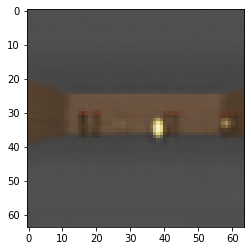

image:  23 done:  0 new action 1


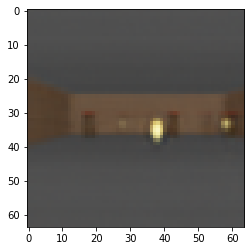

image:  24 done:  0 new action 1


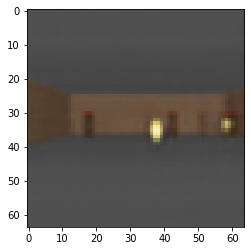

image:  25 done:  0 new action 0


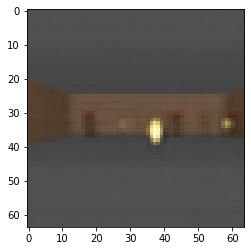

image:  26 done:  0 new action 0


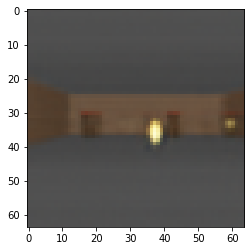

image:  27 done:  0 new action 0


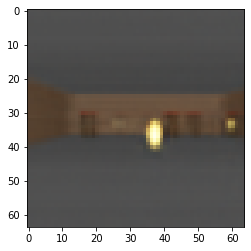

image:  28 done:  0 new action 0


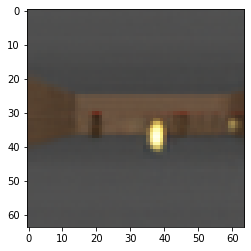

image:  29 done:  0 new action 1


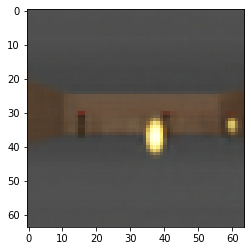

image:  30 done:  0 new action 0


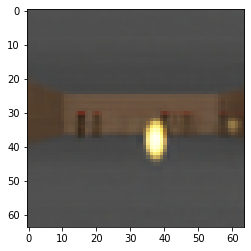

image:  31 done:  0 new action 0


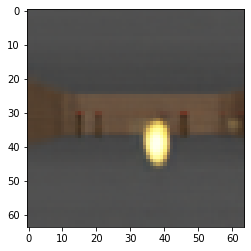

image:  32 done:  0 new action 1


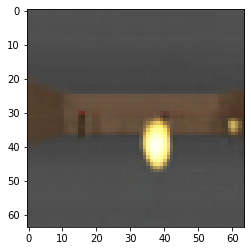

image:  33 done:  0 new action 0


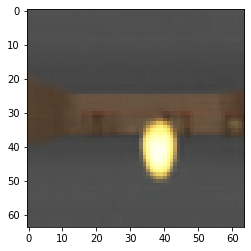

image:  34 done:  0 new action 0


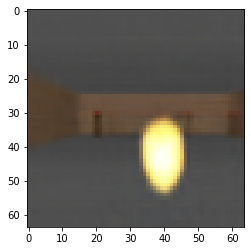

image:  35 done:  0 new action 0


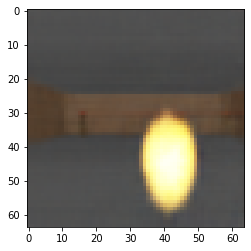

image:  36 done:  1 new action 0


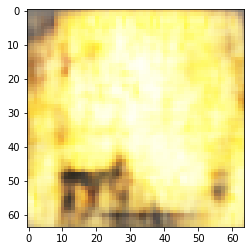

image:  37 done:  0 new action 1


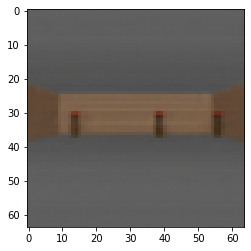

image:  38 done:  0 new action 1


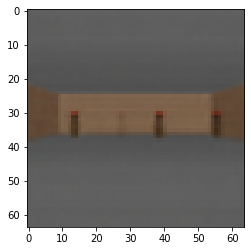

image:  39 done:  0 new action 1


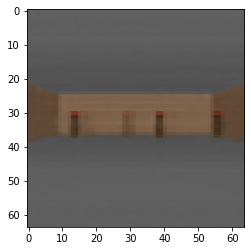

image:  40 done:  0 new action 1


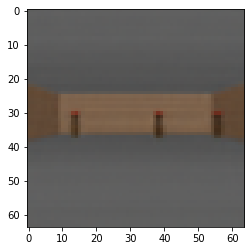

image:  41 done:  0 new action 0


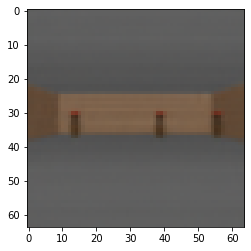

image:  42 done:  0 new action 0


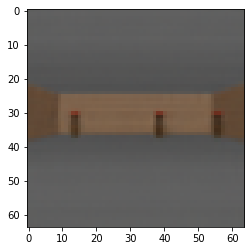

image:  43 done:  0 new action 1


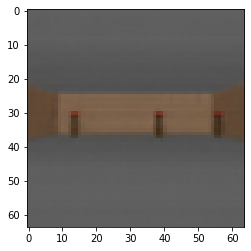

image:  44 done:  0 new action 0


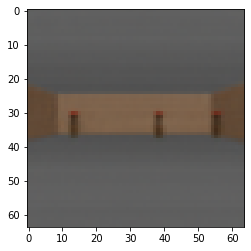

image:  45 done:  0 new action 1


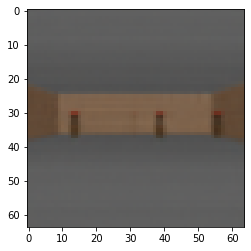

image:  46 done:  0 new action 0


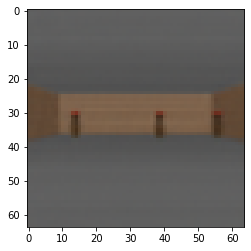

image:  47 done:  0 new action 1


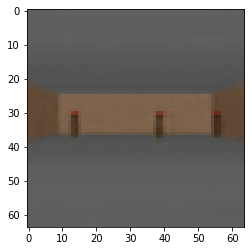

image:  48 done:  0 new action 1


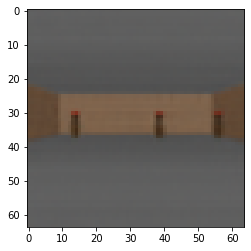

image:  49 done:  0 new action 1


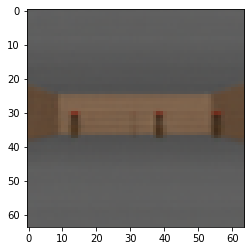

image:  50 done:  0 new action 1


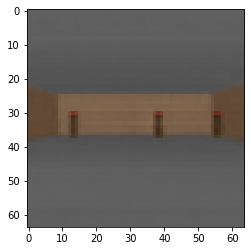

image:  51 done:  0 new action 0


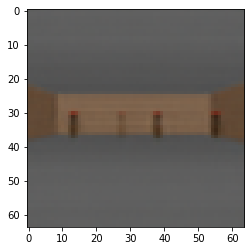

image:  52 done:  0 new action 0


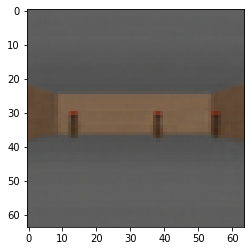

image:  53 done:  0 new action 0


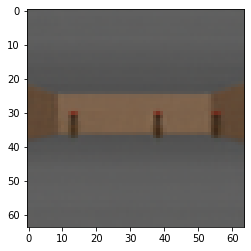

image:  54 done:  0 new action 0


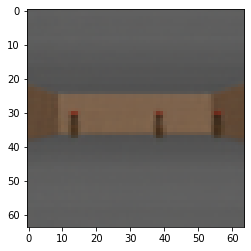

image:  55 done:  0 new action 0


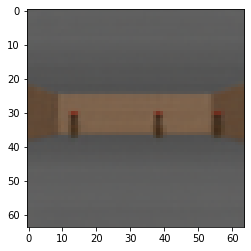

image:  56 done:  0 new action 0


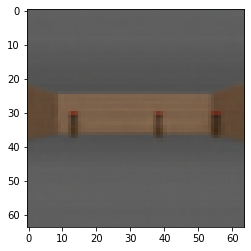

image:  57 done:  0 new action 1


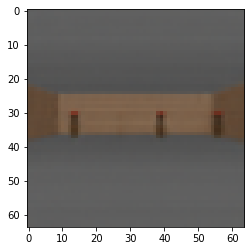

image:  58 done:  0 new action 1


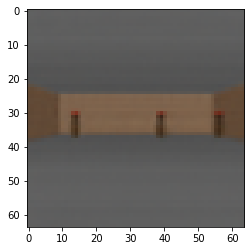

image:  59 done:  0 new action 1


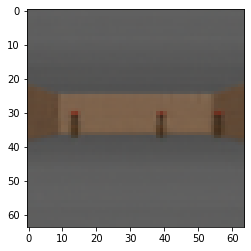

image:  60 done:  0 new action 1


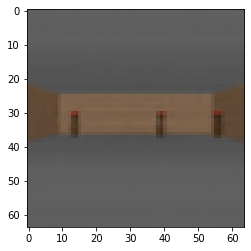

image:  61 done:  0 new action 0


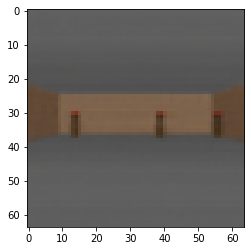

image:  62 done:  0 new action 1


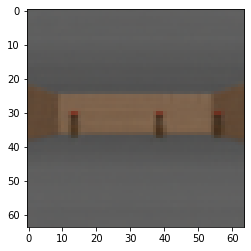

image:  63 done:  0 new action 0


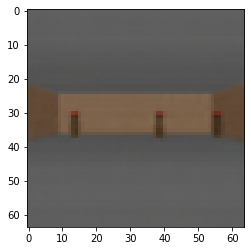

image:  64 done:  0 new action 1


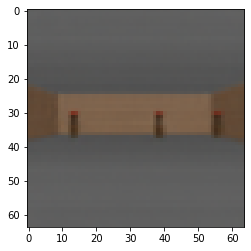

image:  65 done:  0 new action 0


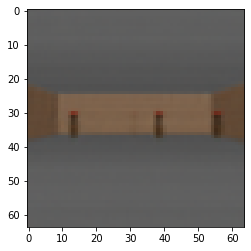

image:  66 done:  0 new action 0


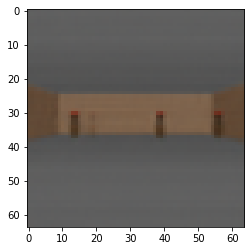

image:  67 done:  0 new action 0


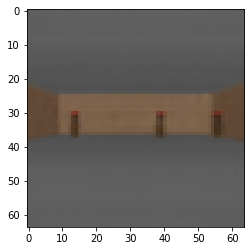

image:  68 done:  0 new action 1


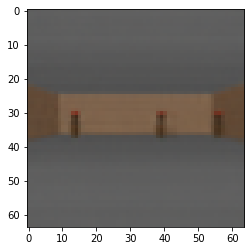

image:  69 done:  0 new action 1


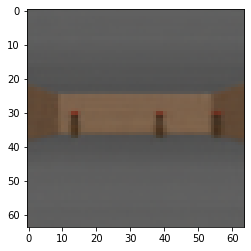

image:  70 done:  0 new action 0


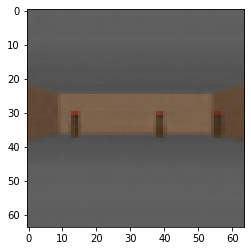

image:  71 done:  0 new action 0


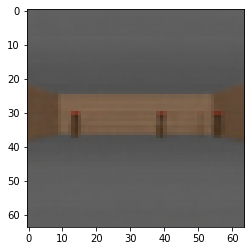

image:  72 done:  0 new action 0


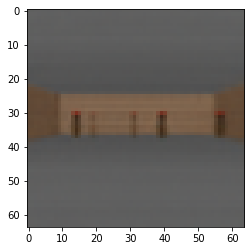

image:  73 done:  0 new action 1


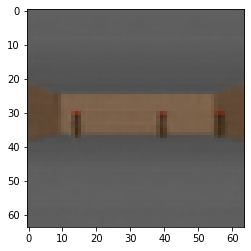

image:  74 done:  0 new action 1


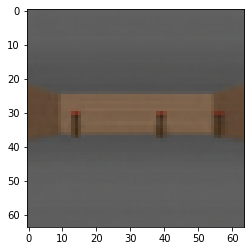

image:  75 done:  0 new action 1


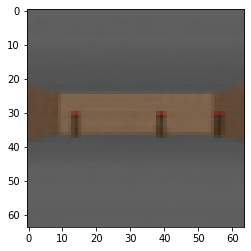

image:  76 done:  0 new action 0


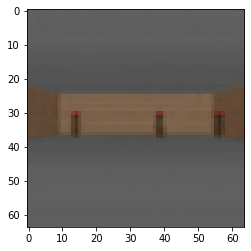

image:  77 done:  0 new action 0


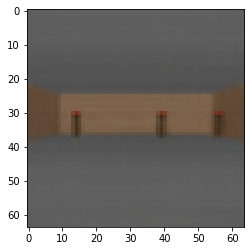

image:  78 done:  0 new action 0


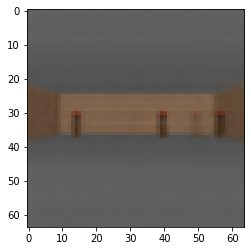

image:  79 done:  0 new action 1


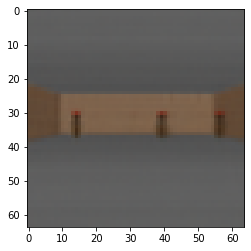

image:  80 done:  0 new action 0


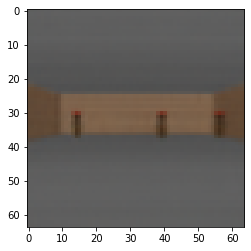

image:  81 done:  0 new action 0


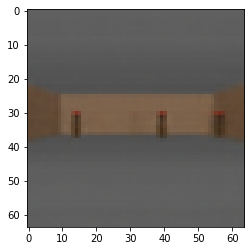

image:  82 done:  0 new action 0


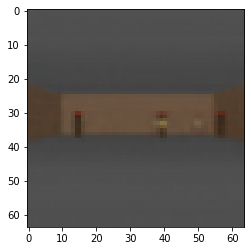

image:  83 done:  0 new action 0


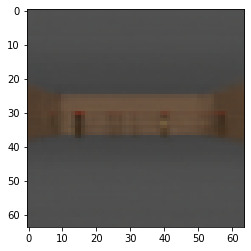

image:  84 done:  0 new action 0


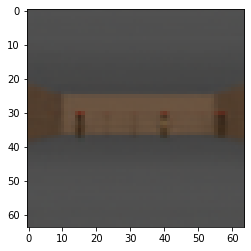

image:  85 done:  0 new action 0


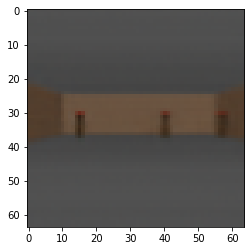

image:  86 done:  0 new action 0


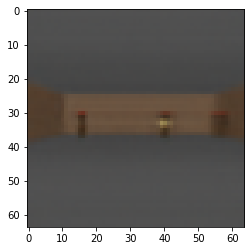

image:  87 done:  0 new action 1


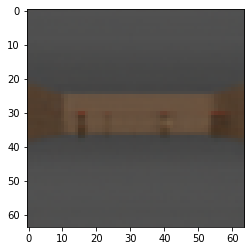

image:  88 done:  0 new action 0


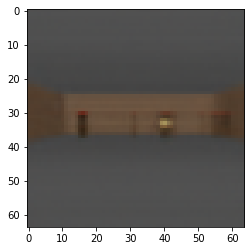

image:  89 done:  0 new action 1


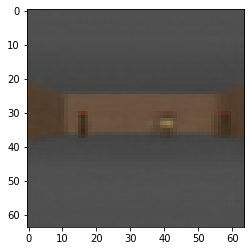

image:  90 done:  0 new action 0


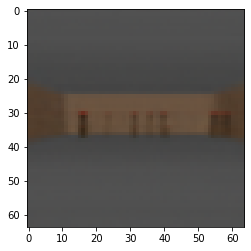

image:  91 done:  0 new action 0


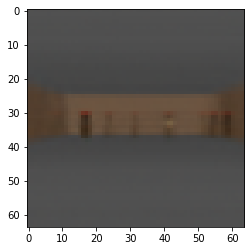

image:  92 done:  0 new action 0


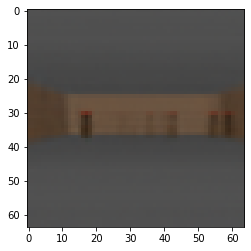

image:  93 done:  0 new action 0


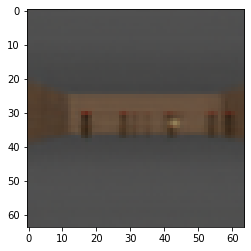

image:  94 done:  0 new action 1


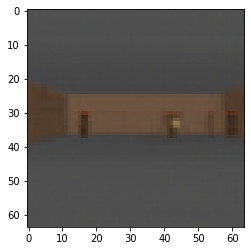

image:  95 done:  0 new action 1


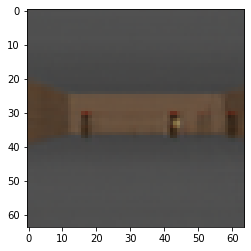

image:  96 done:  0 new action 0


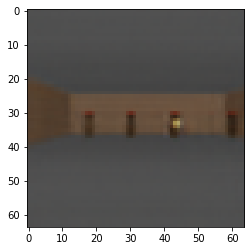

image:  97 done:  0 new action 1


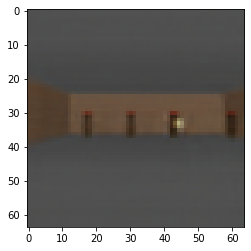

image:  98 done:  0 new action 1


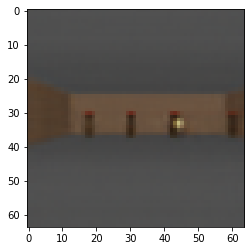

image:  99 done:  0 new action 0


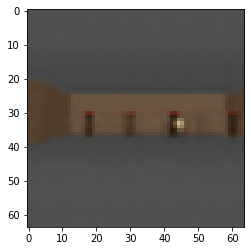

In [6]:
'''print("VERA SEQUENZA")

for i in range(1,100):
    new_state = batch_encoded_frames[0][0][i]
    decoded = vae.decode_latent_vec(new_state)
    choosed_img = vae.post_process_frame(decoded)
    print("image: ", i, "done: ", batch_reset[0][0][i],  "new action", batch_actions[0][0][i])
    imgplot = plt.imshow(choosed_img)
    plt.show()
'''

In [6]:
learned_env = lstm_doom_env.DOOM_LSTM_ENV(vae)


Session Started!
<tf.Variable 'lstm_unroll/lstm_cell/kernel:0' shape=(1090, 4096) dtype=float32_ref>
<tf.Variable 'lstm_unroll/lstm_cell/bias:0' shape=(4096,) dtype=float32_ref>
<tf.Variable 'lstm_activation_function/rnn_output_w:0' shape=(1024, 961) dtype=float32_ref>
<tf.Variable 'lstm_activation_function/rnn_output_b:0' shape=(961,) dtype=float32_ref>
Model loaded!


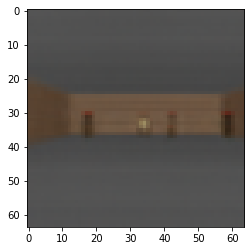

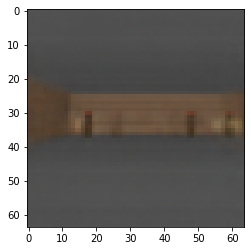

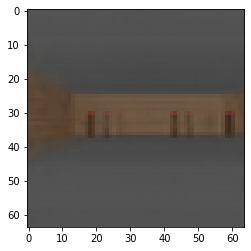

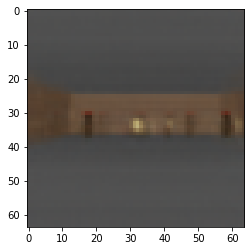

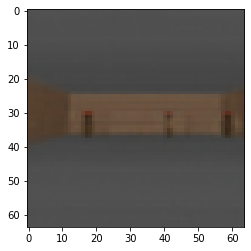

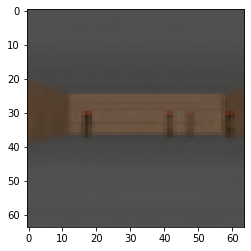

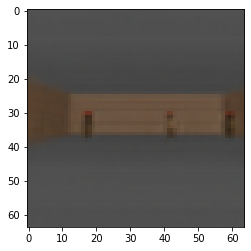

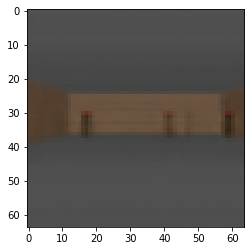

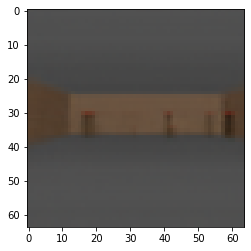

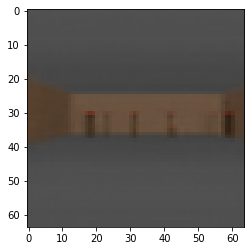

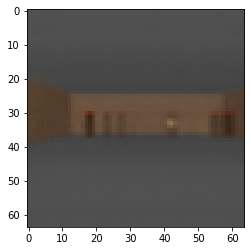

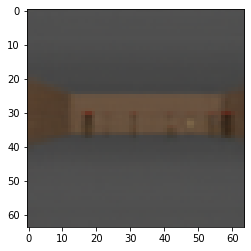

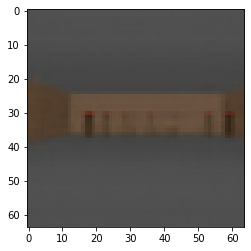

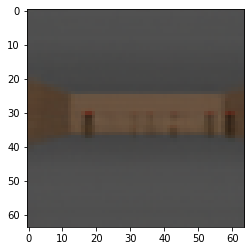

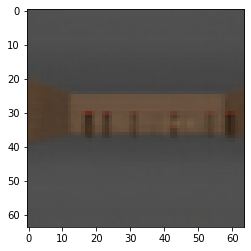

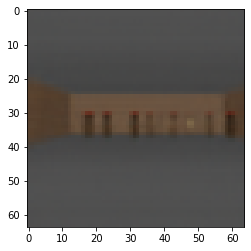

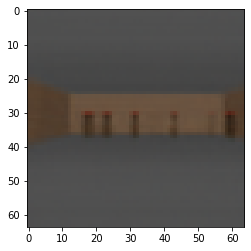

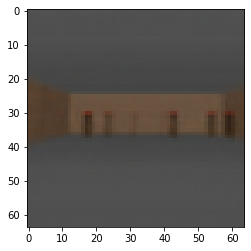

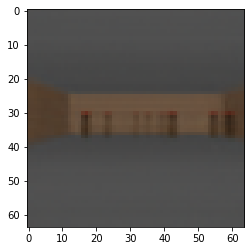

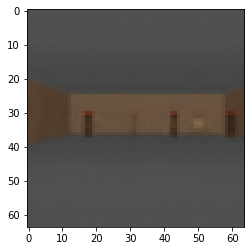

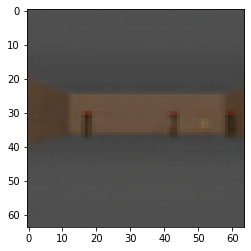

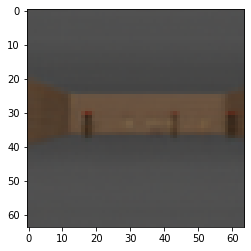

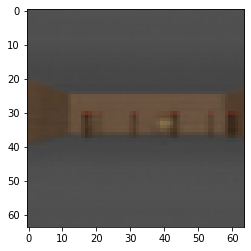

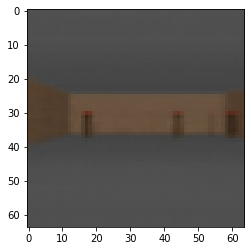

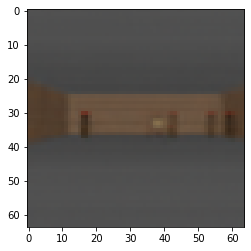

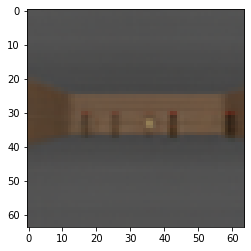

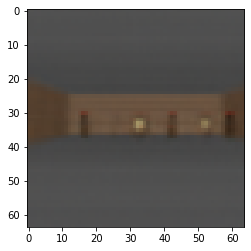

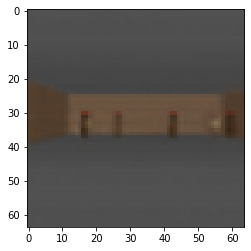

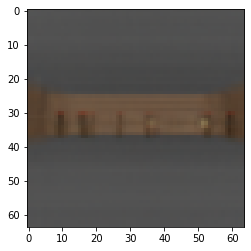

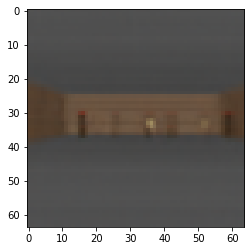

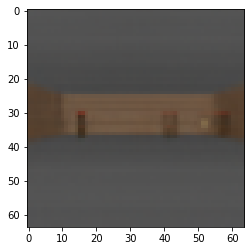

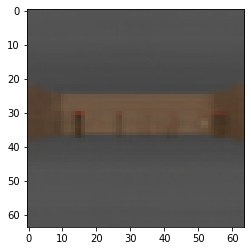

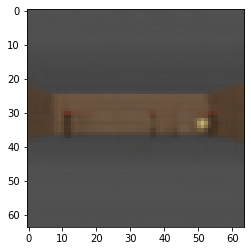

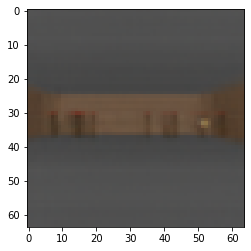

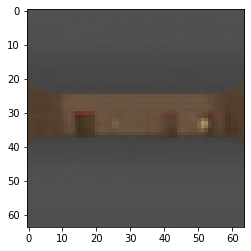

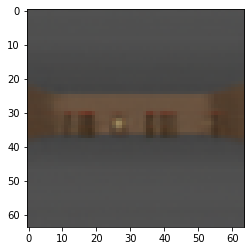

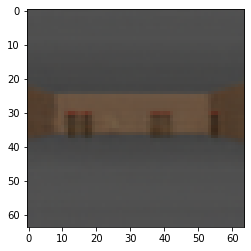

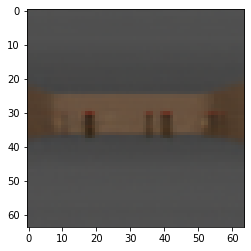

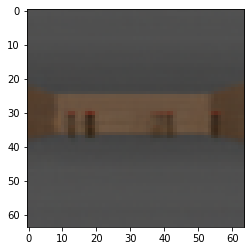

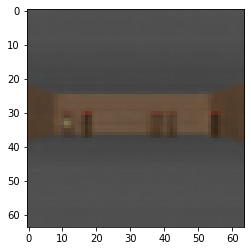

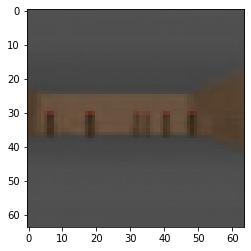

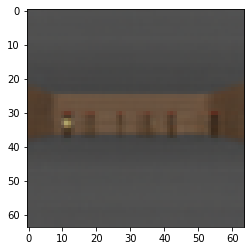

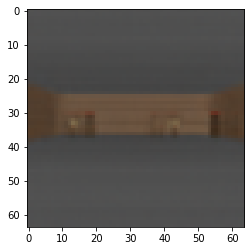

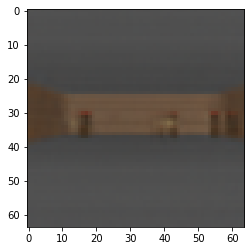

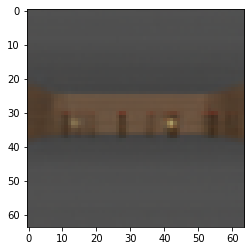

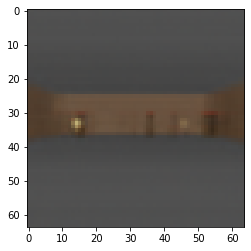

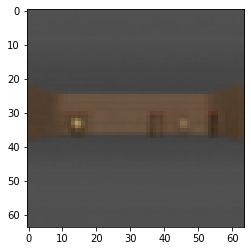

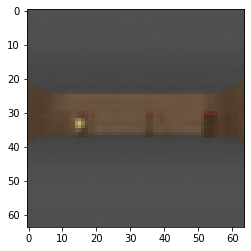

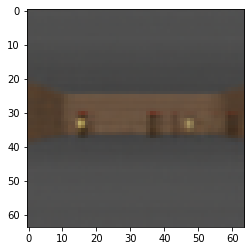

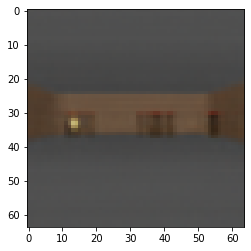

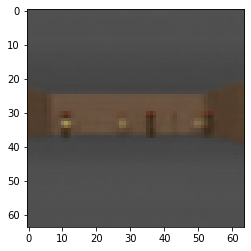

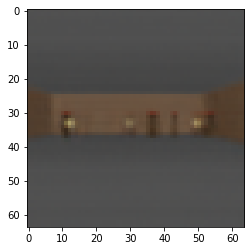

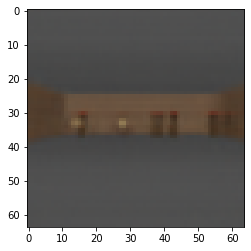

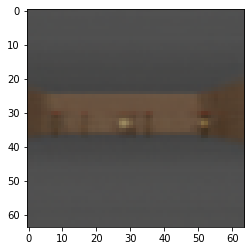

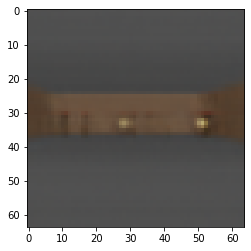

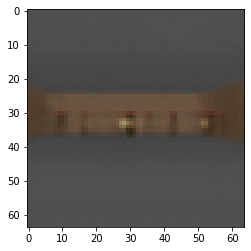

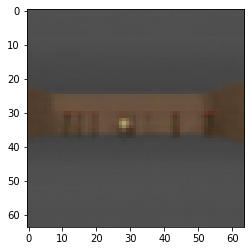

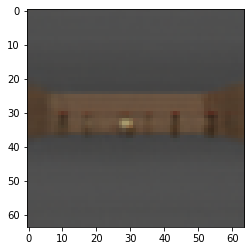

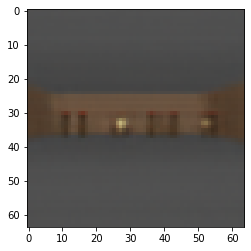

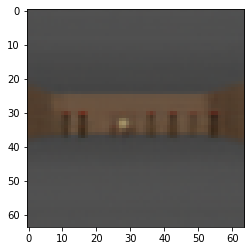

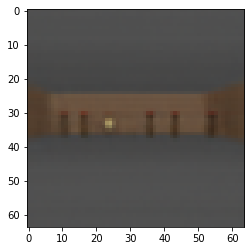

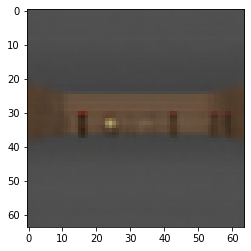

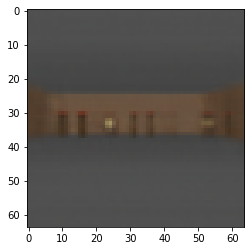

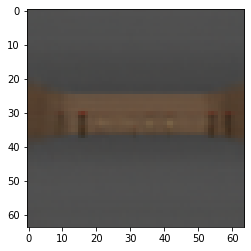

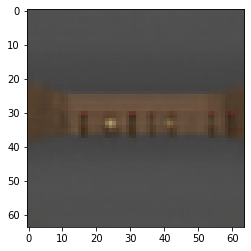

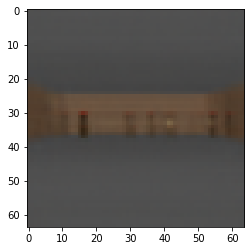

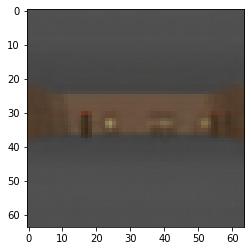

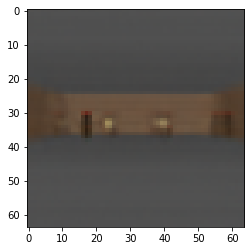

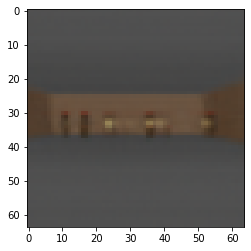

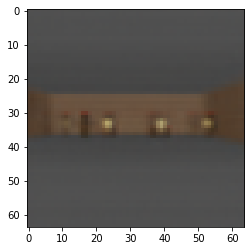

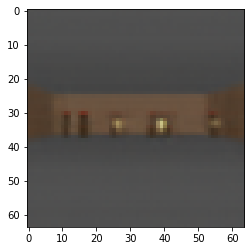

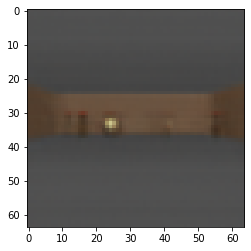

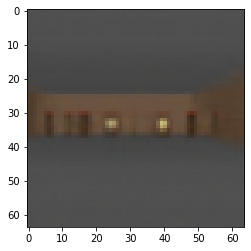

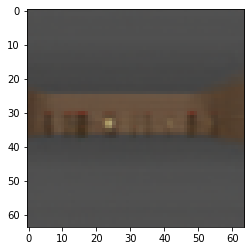

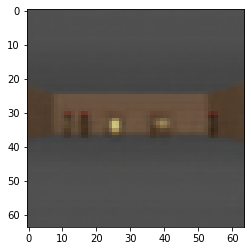

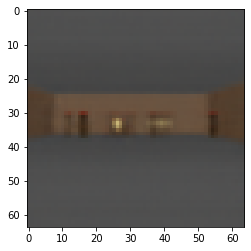

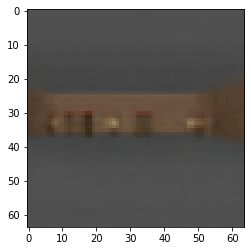

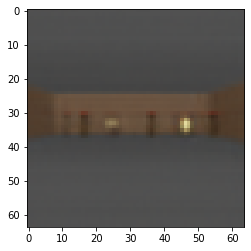

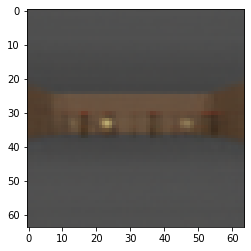

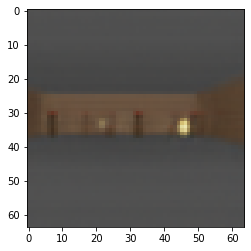

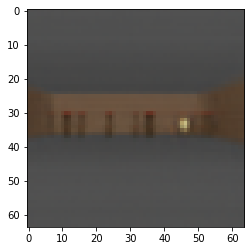

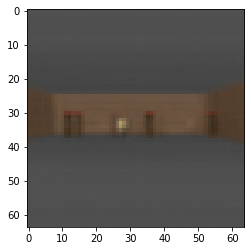

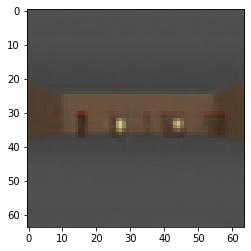

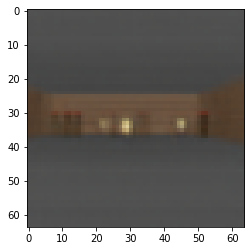

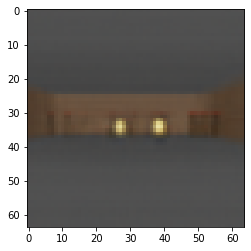

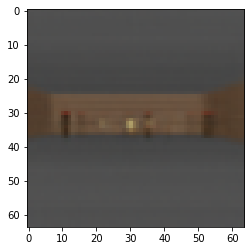

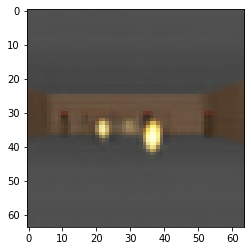

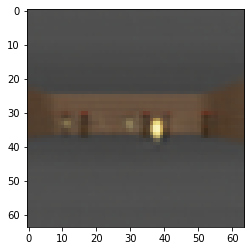

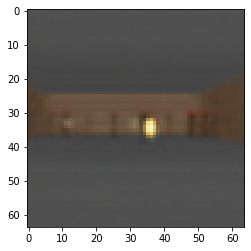

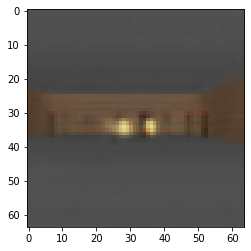

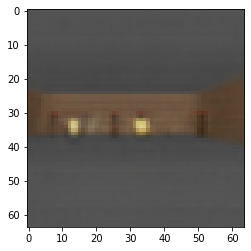

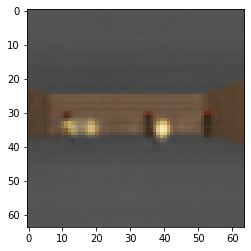

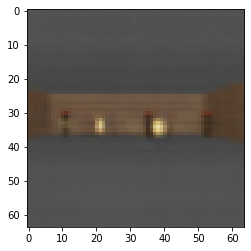

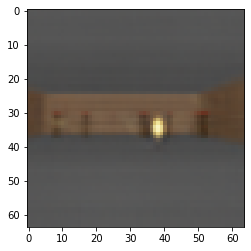

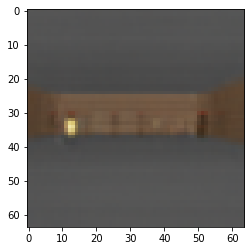

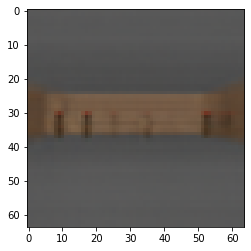

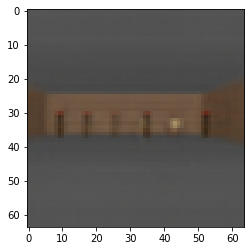

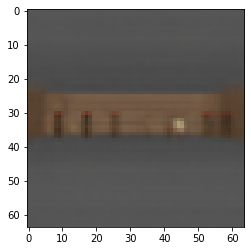

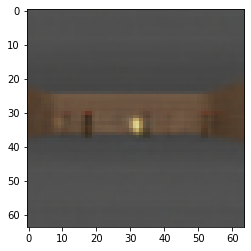

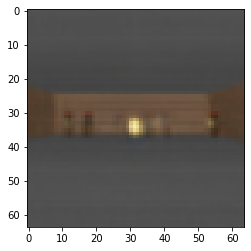

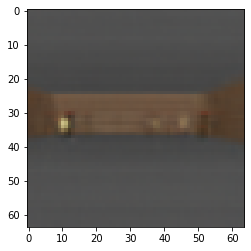

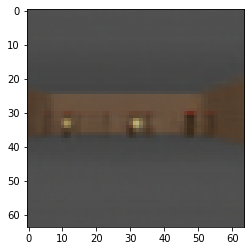

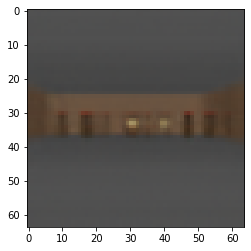

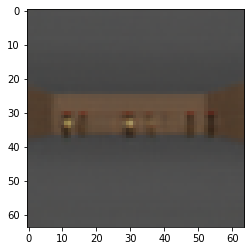

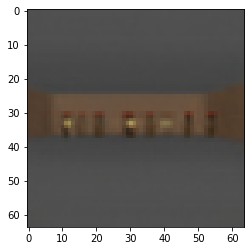

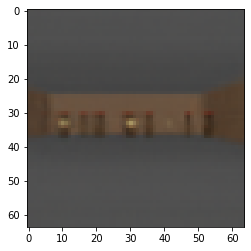

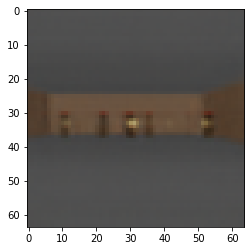

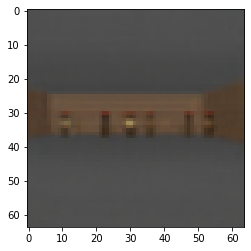

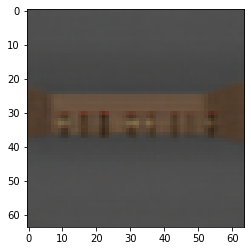

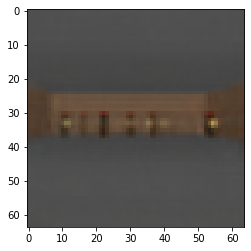

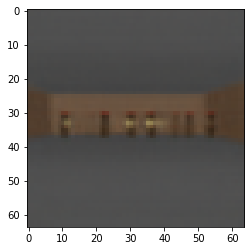

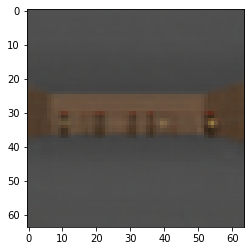

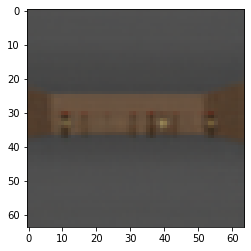

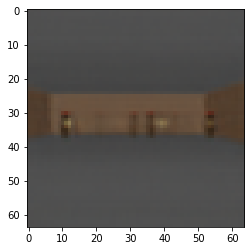

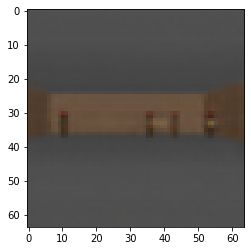

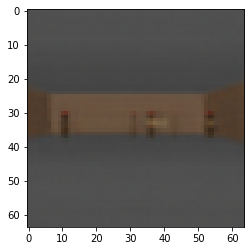

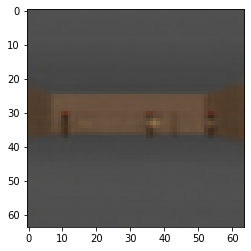

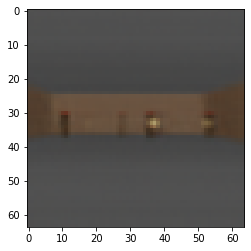

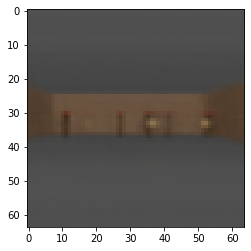

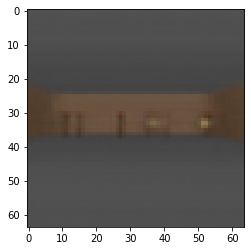

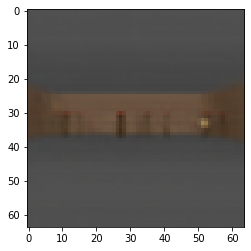

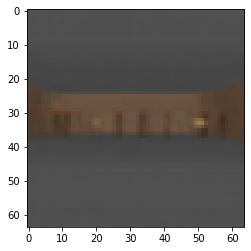

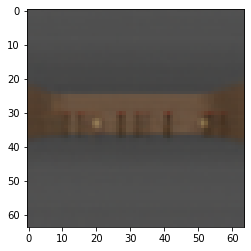

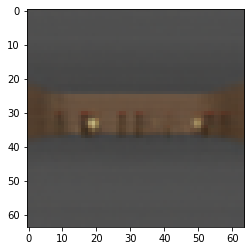

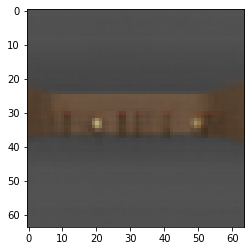

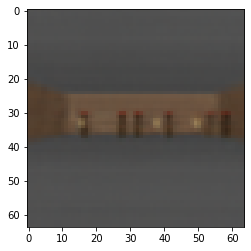

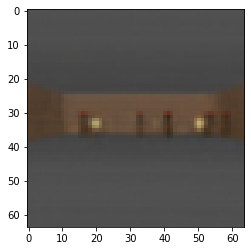

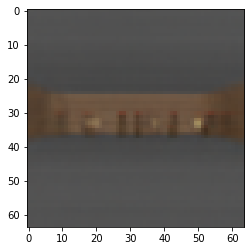

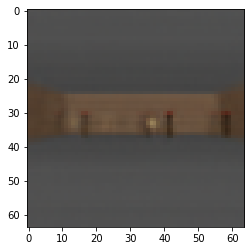

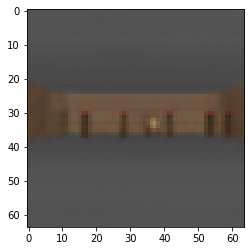

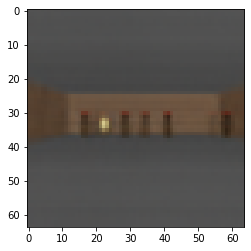

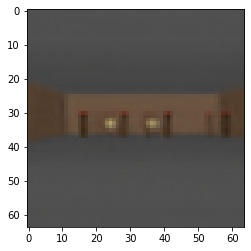

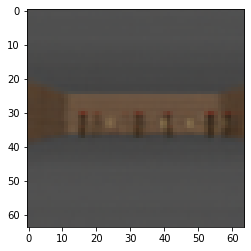

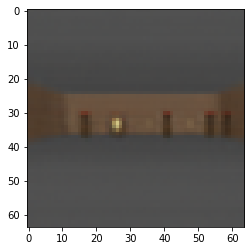

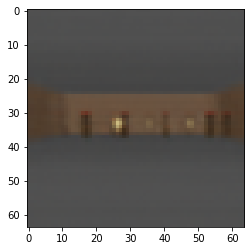

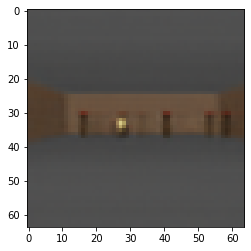

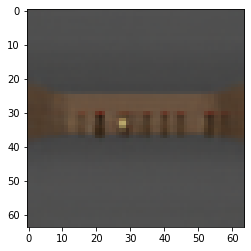

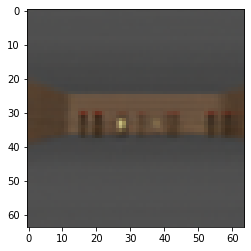

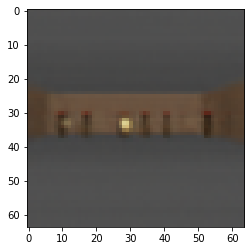

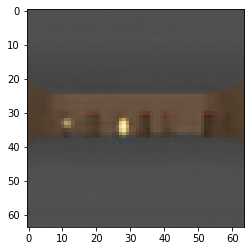

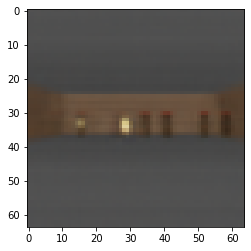

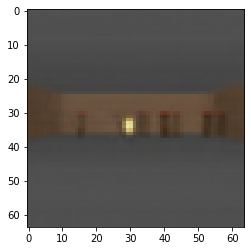

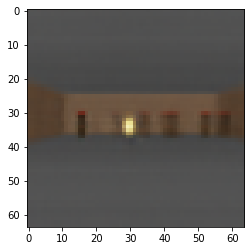

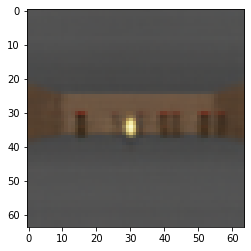

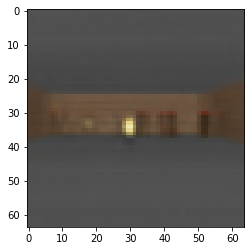

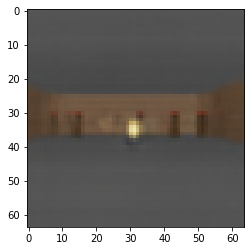

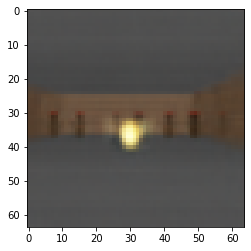

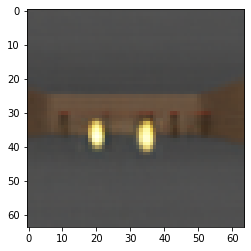

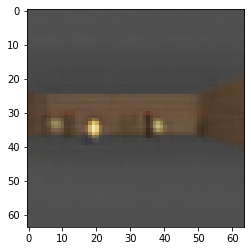

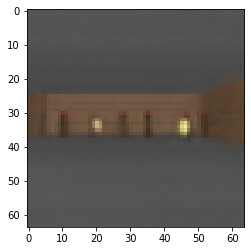

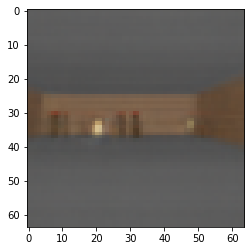

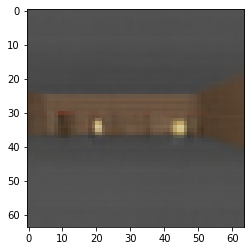

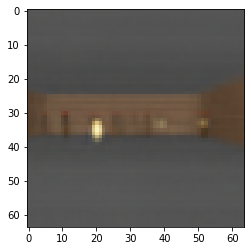

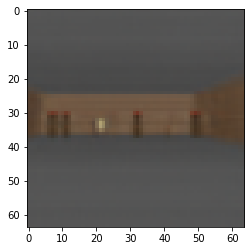

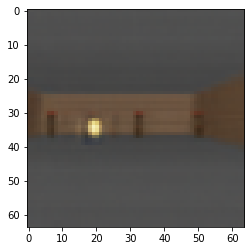

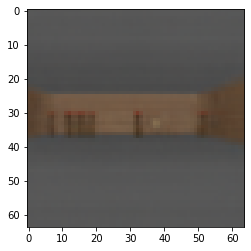

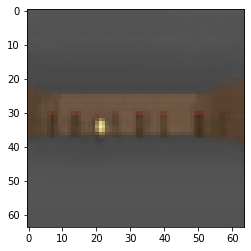

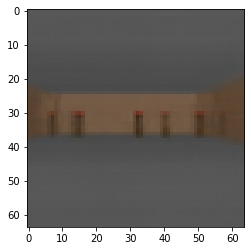

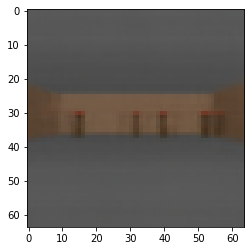

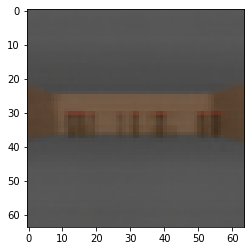

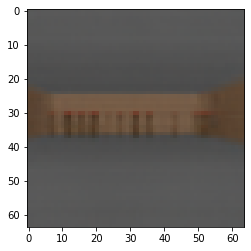

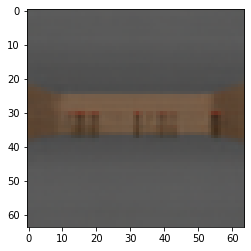

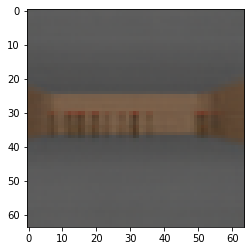

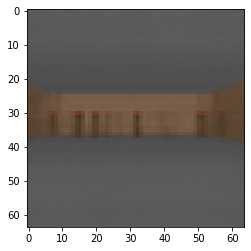

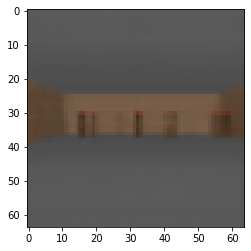

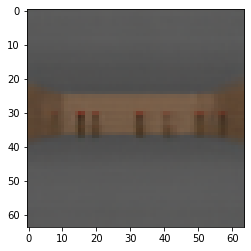

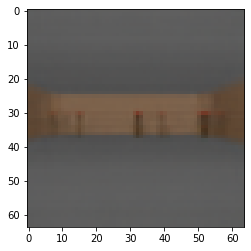

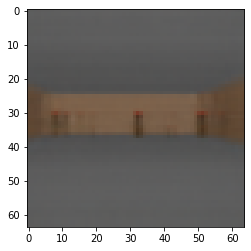

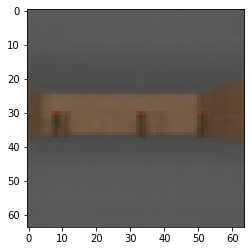

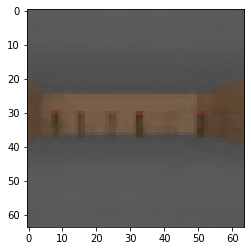

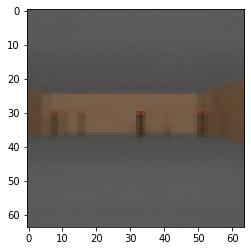

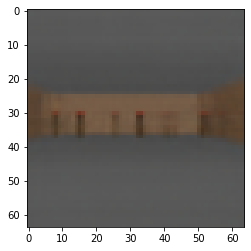

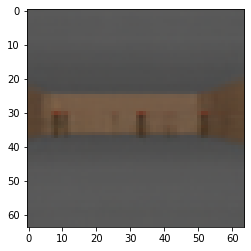

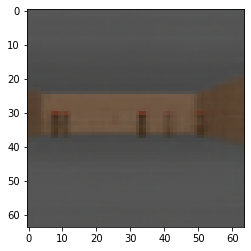

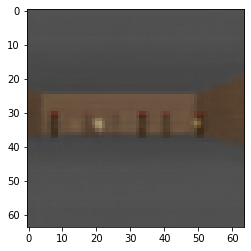

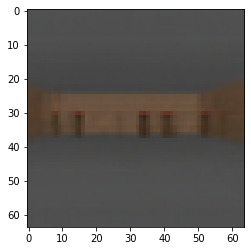

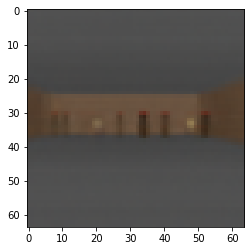

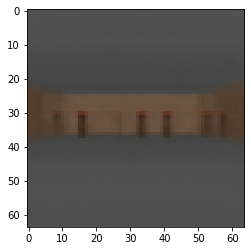

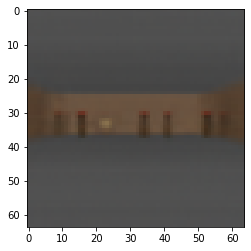

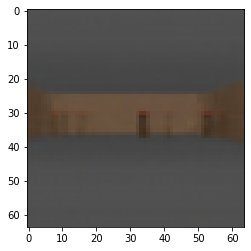

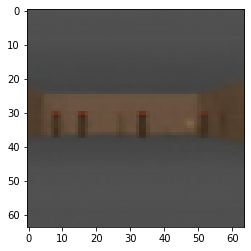

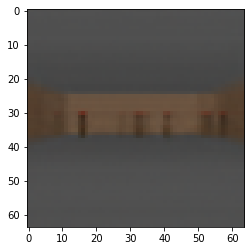

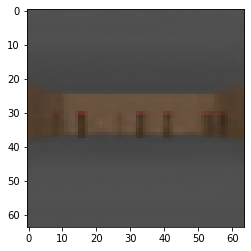

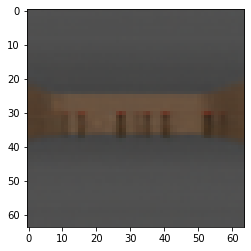

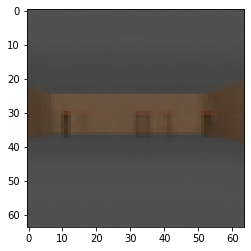

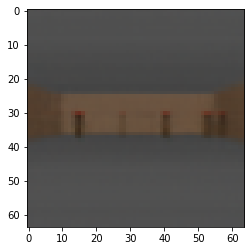

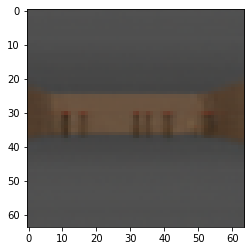

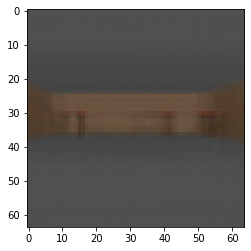

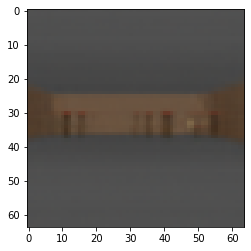

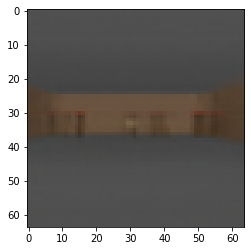

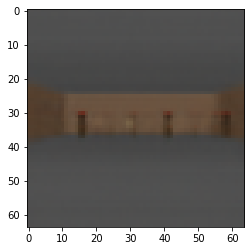

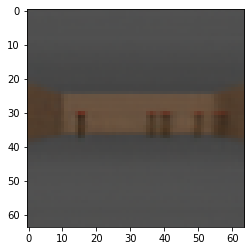

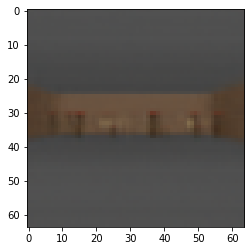

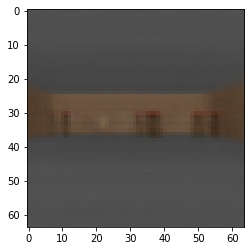

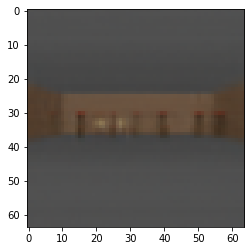

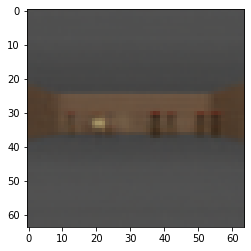

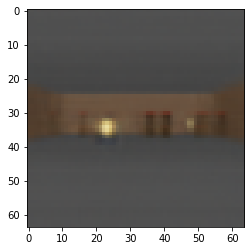

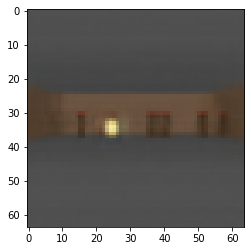

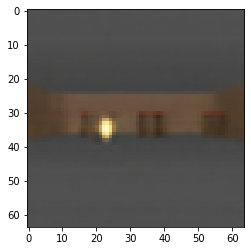

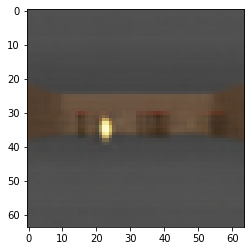

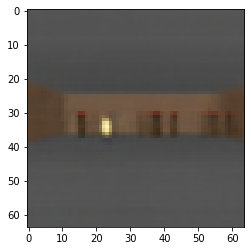

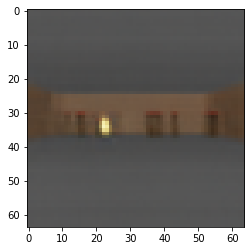

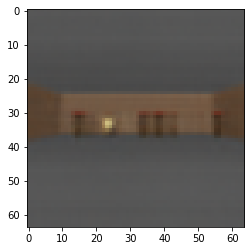

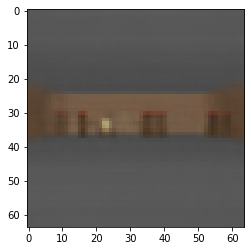

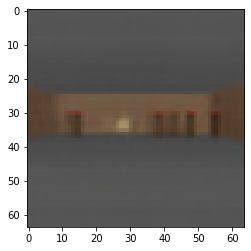

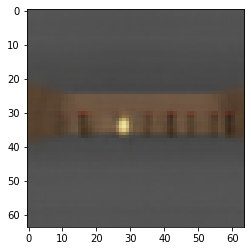

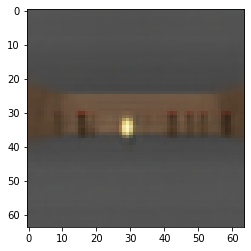

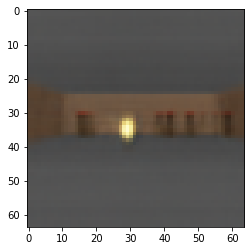

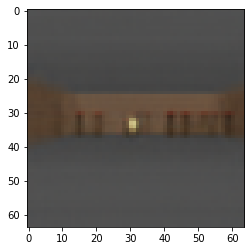

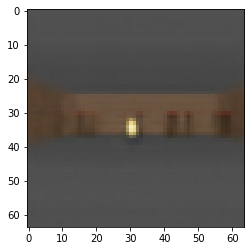

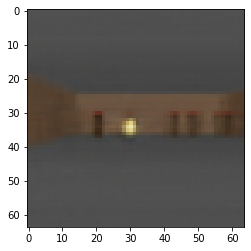

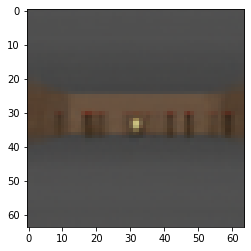

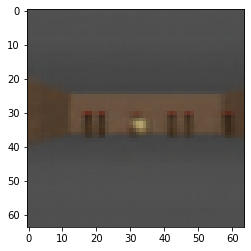

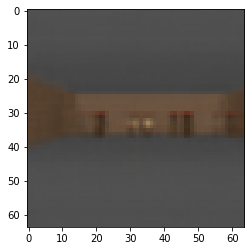

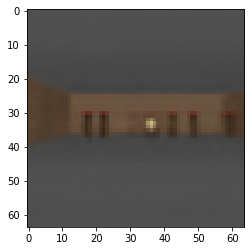

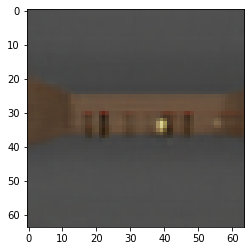

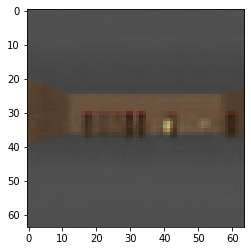

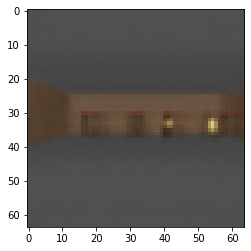

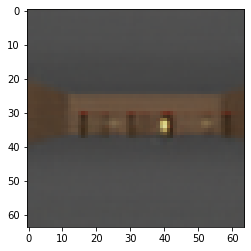

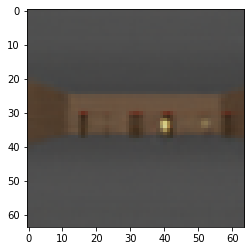

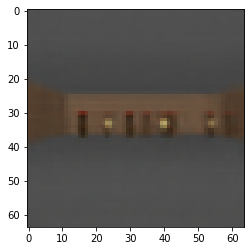

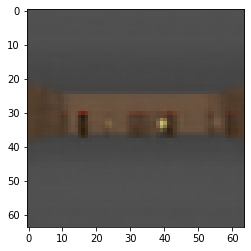

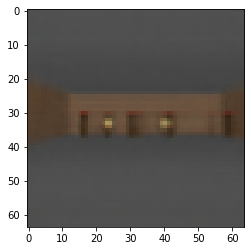

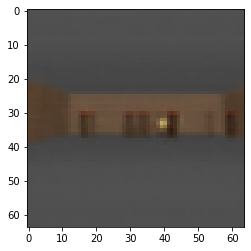

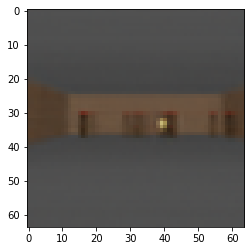

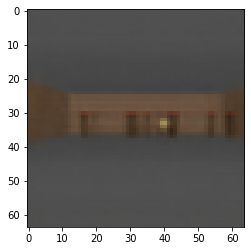

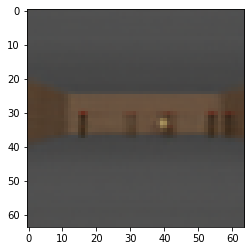

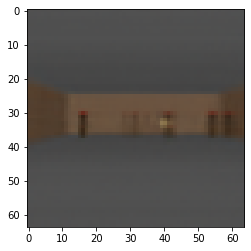

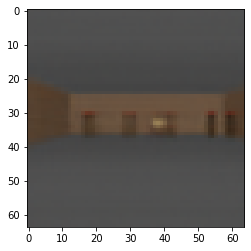

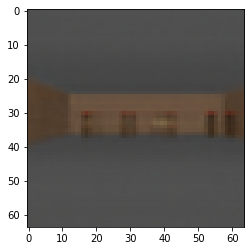

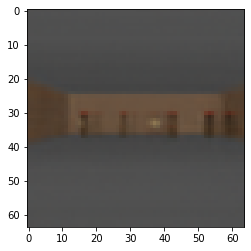

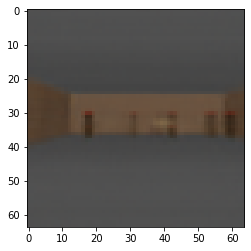

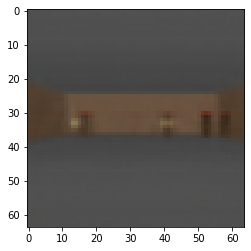

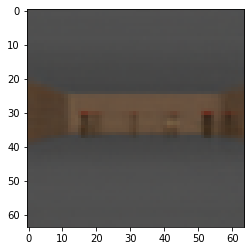

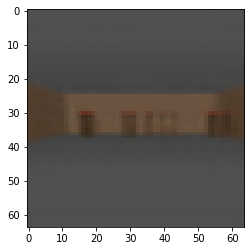

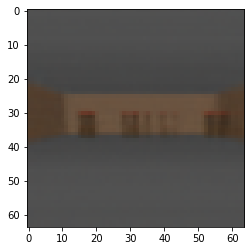

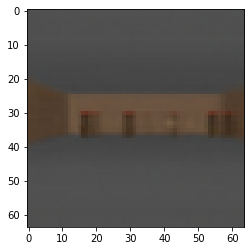

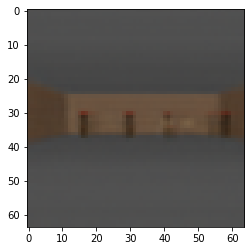

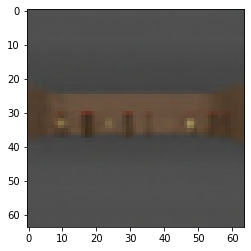

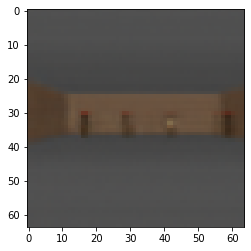

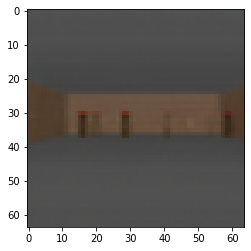

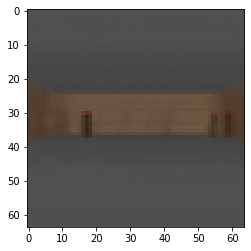

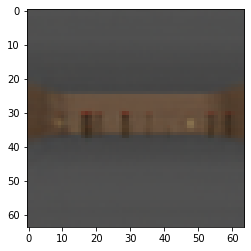

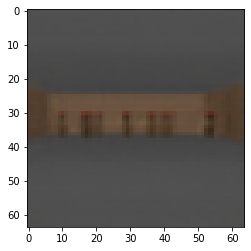

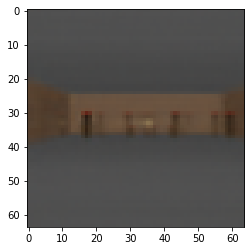

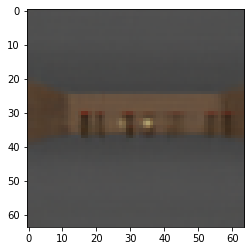

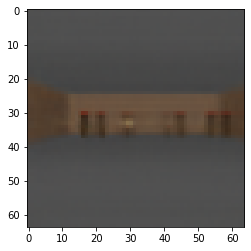

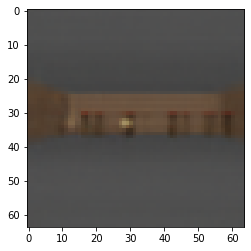

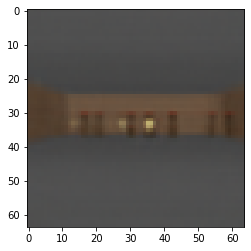

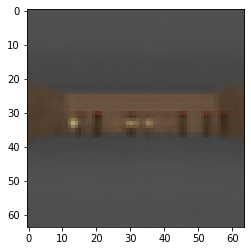

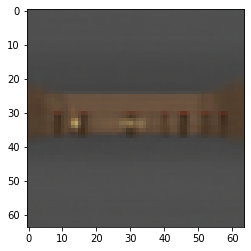

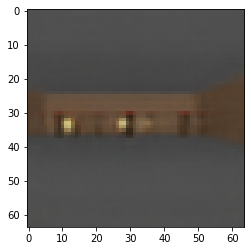

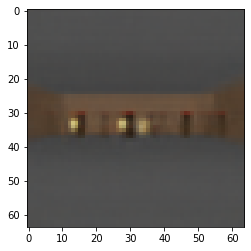

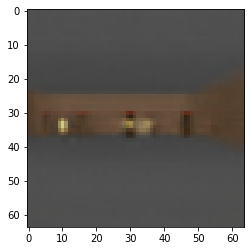

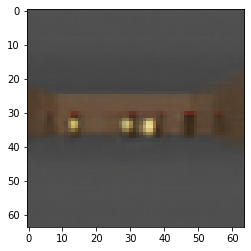

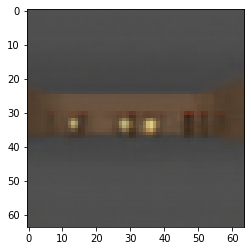

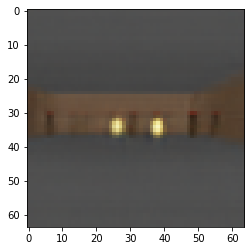

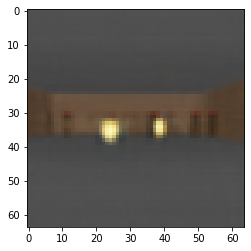

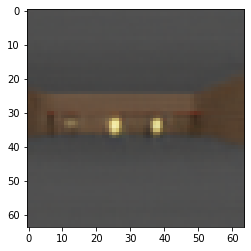

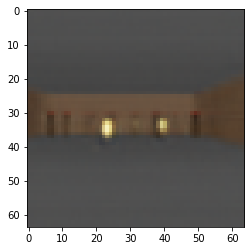

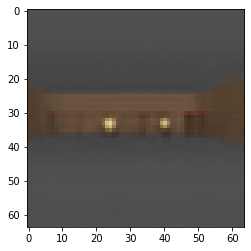

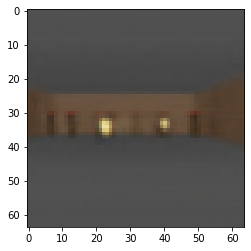

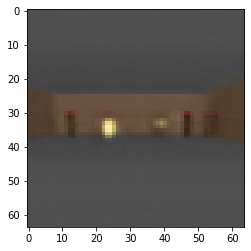

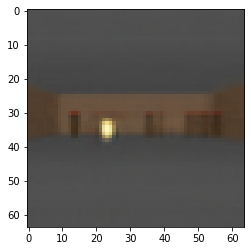

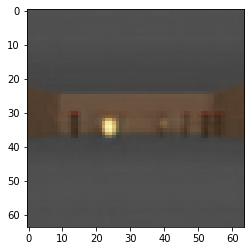

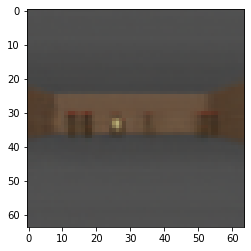

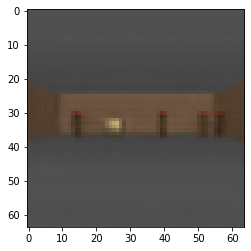

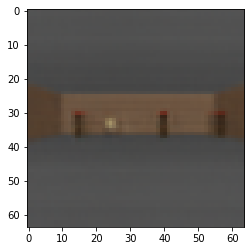

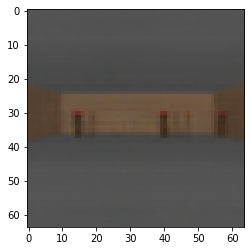

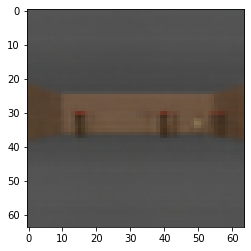

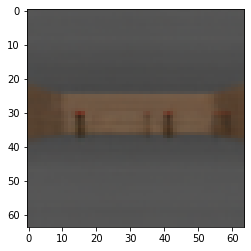

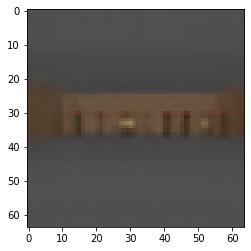

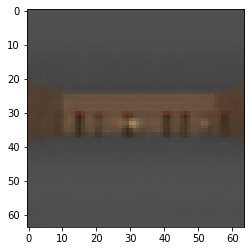

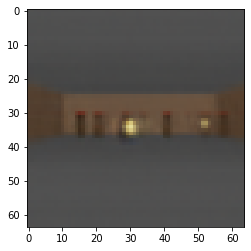

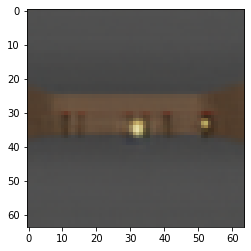

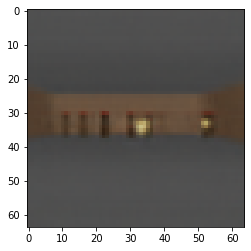

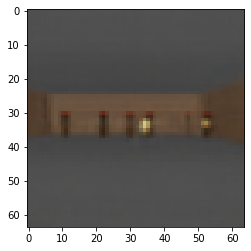

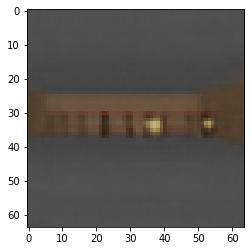

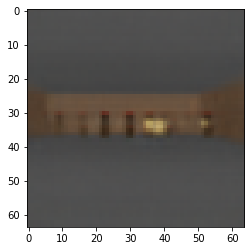

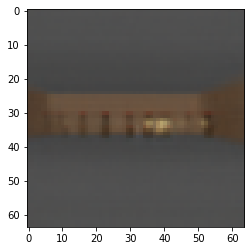

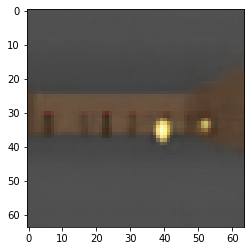

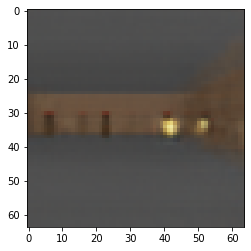

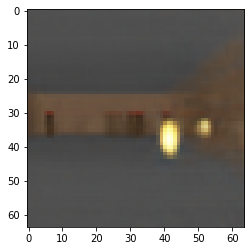

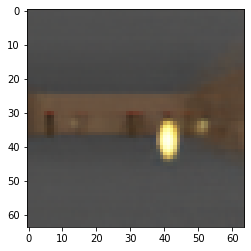

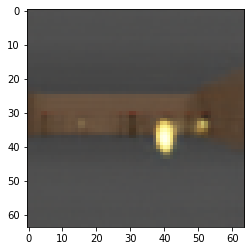

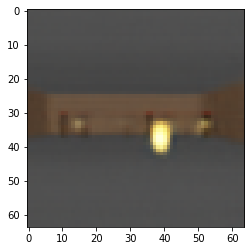

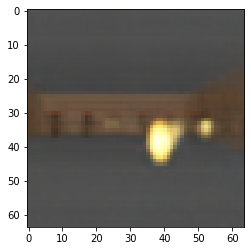

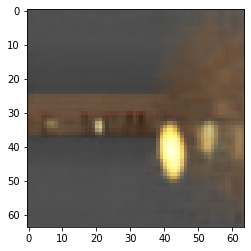

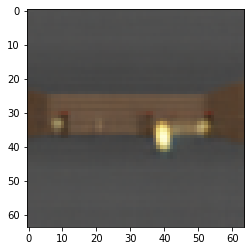

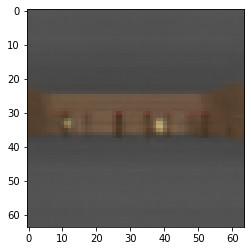

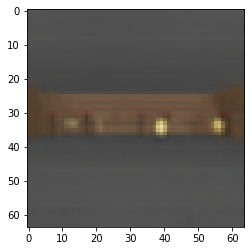

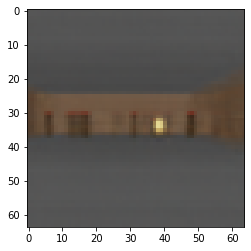

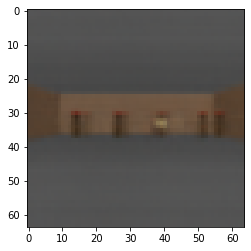

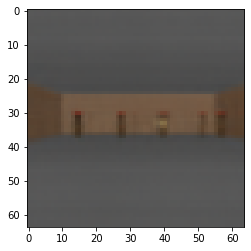

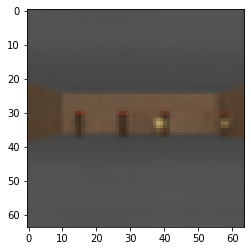

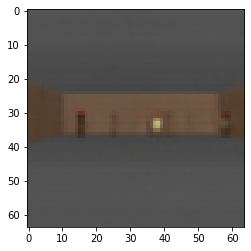

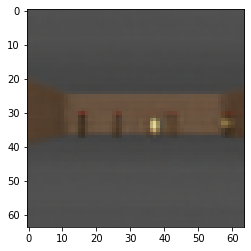

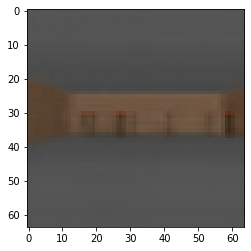

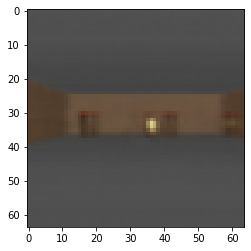

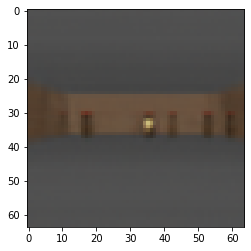

In [7]:
new_state,reward,done = learned_env.step(batch_encoded_frames[0][0][250],batch_actions[0][0][250],batch_reset[0][0][250])

for i in range(300):
    decoded = vae.decode_latent_vec(new_state)
    choosed_img = vae.post_process_frame(decoded)
    imgplot = plt.imshow(choosed_img)
    plt.show()
    new_state,reward,done = learned_env.step(new_state,batch_actions[0][0][i],done)
    if done:
        print("MORTO")
    i+=1


In [19]:
import imageio
from matplotlib import cm

images = []
for i in range(300):
    decoded = vae.decode_latent_vec(new_state)
    choosed_img = vae.post_process_frame(decoded)
    images.append(choosed_img)
    #imgplot = plt.imshow(choosed_img)
    #plt.show()
    new_state,reward,done = learned_env.step(new_state,batch_actions[0][0][i],done)
    if done:
        print("MORTO")
    i+=1
imageio.mimsave('dream.gif', images)

    


PermissionError: [Errno 13] Permission denied: '/dream.gif'

real done:  0  my done:  False
real done:  0  my done:  False
real done:  0  my done:  False
real done:  0  my done:  False


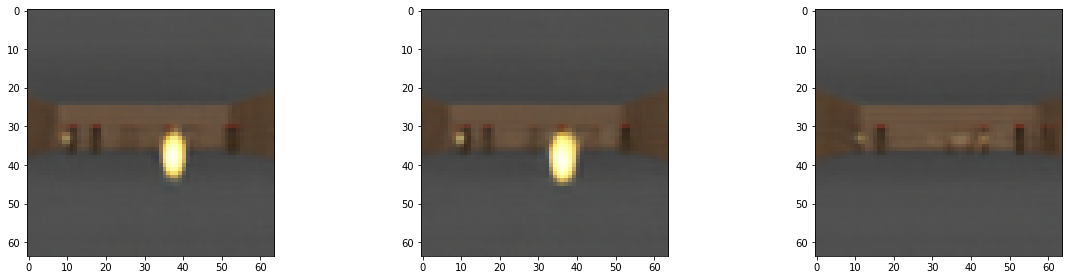

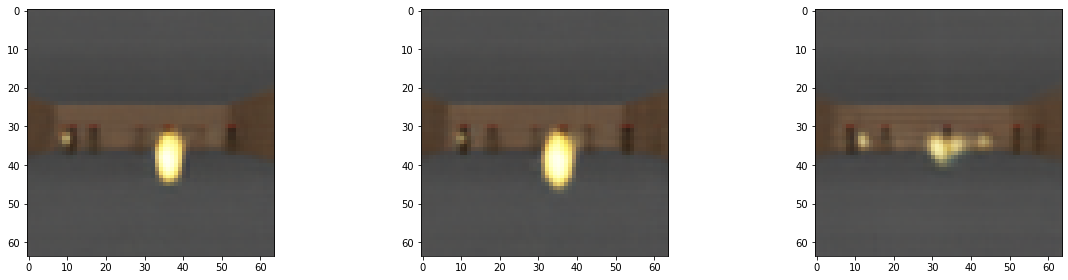

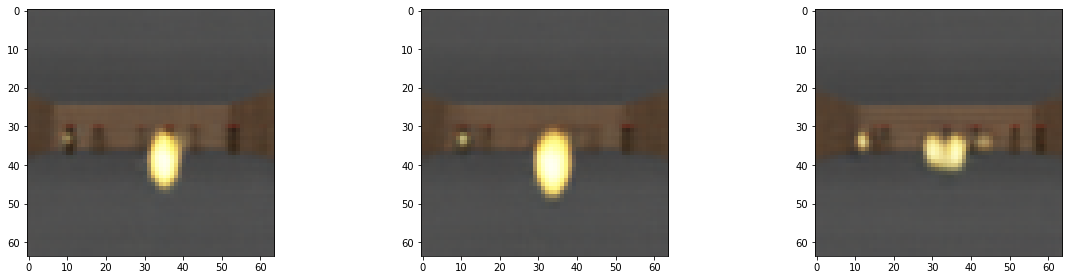

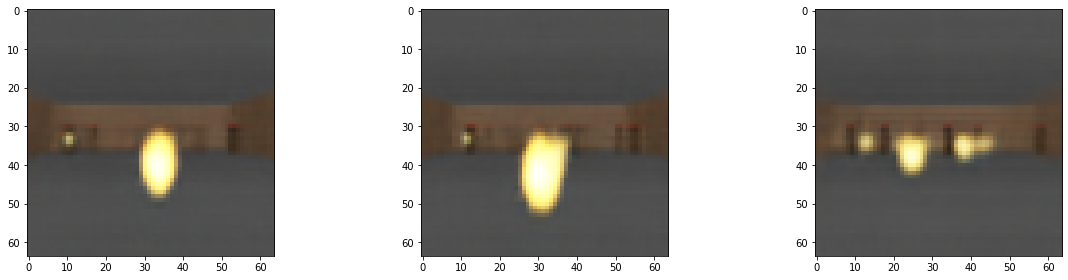

In [14]:
x = 330
for i in range(x,x+4):
    new_z,reward,done = learned_env.step(batch_encoded_frames[0][0][i],batch_actions[0][0][i],batch_reset[0][0][i])
    
    
    real_image = vae.post_process_frame(vae.decode_latent_vec(batch_encoded_frames[0][0][i]))
    real_evolution = vae.post_process_frame(vae.decode_latent_vec(batch_encoded_frames[0][0][i+1]))
    my_evolution = vae.post_process_frame(vae.decode_latent_vec(new_z))
    
    images = [real_image,real_evolution,my_evolution]
    print("real done: ", batch_reset[0][0][i+1], " my done: ", done)
    plt.figure(figsize=(20,10))
    columns = 3
    for i, image in enumerate(images):
        plt.subplot(len(images) / columns + 1, columns, i + 1)
        plt.imshow(image)
    i+=1

In [7]:
'''i = 10
new_z,reward,done = gen.step(batch_encoded_frames[0][0][i],batch_actions[0][0][i],batch_reset[0][0][i])
    
real_image = vae.post_process_frame(vae.decode_latent_vec(batch_encoded_frames[0][0][i]))
real_evolution = vae.post_process_frame(vae.decode_latent_vec(batch_encoded_frames[0][0][i+1]))
my_evolution = vae.post_process_frame(vae.decode_latent_vec(new_z))
    
images = [real_image,real_evolution,my_evolution]
plt.figure(figsize=(20,10))
columns = 3
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)'''

'i = 10\nnew_z,reward,done = gen.step(batch_encoded_frames[0][0][i],batch_actions[0][0][i],batch_reset[0][0][i])\n    \nreal_image = vae.post_process_frame(vae.decode_latent_vec(batch_encoded_frames[0][0][i]))\nreal_evolution = vae.post_process_frame(vae.decode_latent_vec(batch_encoded_frames[0][0][i+1]))\nmy_evolution = vae.post_process_frame(vae.decode_latent_vec(new_z))\n    \nimages = [real_image,real_evolution,my_evolution]\nplt.figure(figsize=(20,10))\ncolumns = 3\nfor i, image in enumerate(images):\n    plt.subplot(len(images) / columns + 1, columns, i + 1)\n    plt.imshow(image)'

In [8]:
'''pesca_immagine = 134

generated_sequence = learned_env.genetare_sequence(batch_encoded_frames[0][0][pesca_immagine])

print("Immagine di inizio")
new_state = batch_encoded_frames[0][0][pesca_immagine]
decoded = vae.decode_latent_vec(new_state)
choosed_img = vae.post_process_frame(decoded)
imgplot = plt.imshow(choosed_img)
plt.show()

print("Mia sequenza")
for i in range(len(generated_sequence)):
    new_state = generated_sequence[i]
    decoded = vae.decode_latent_vec(new_state)
    choosed_img = vae.post_process_frame(decoded)
    imgplot = plt.imshow(choosed_img)
    plt.show()'''

'pesca_immagine = 134\n\ngenerated_sequence = learned_env.genetare_sequence(batch_encoded_frames[0][0][pesca_immagine])\n\nprint("Immagine di inizio")\nnew_state = batch_encoded_frames[0][0][pesca_immagine]\ndecoded = vae.decode_latent_vec(new_state)\nchoosed_img = vae.post_process_frame(decoded)\nimgplot = plt.imshow(choosed_img)\nplt.show()\n\nprint("Mia sequenza")\nfor i in range(len(generated_sequence)):\n    new_state = generated_sequence[i]\n    decoded = vae.decode_latent_vec(new_state)\n    choosed_img = vae.post_process_frame(decoded)\n    imgplot = plt.imshow(choosed_img)\n    plt.show()'

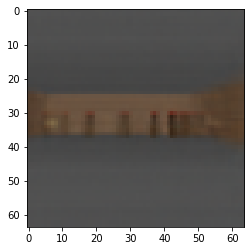

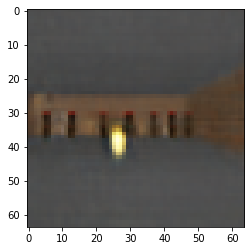

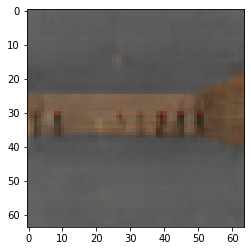

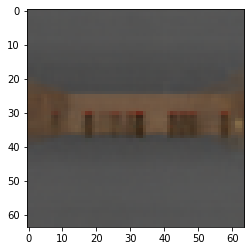

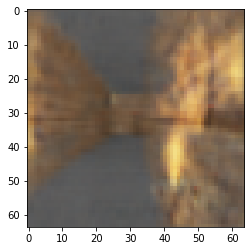

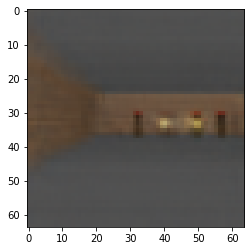

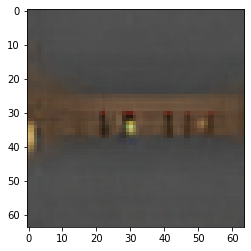

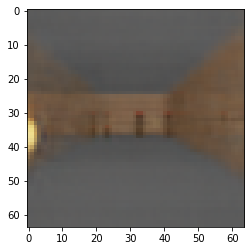

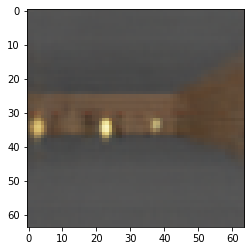

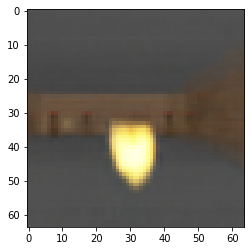

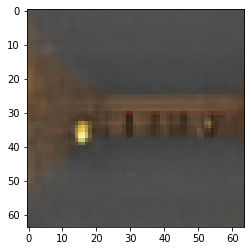

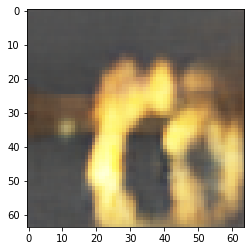

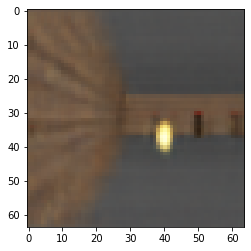

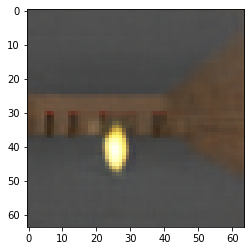

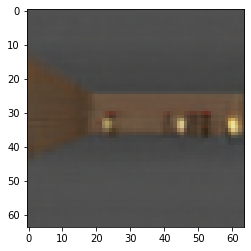

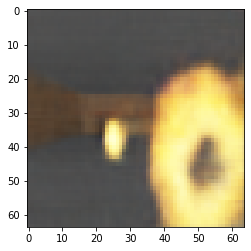

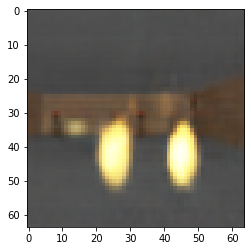

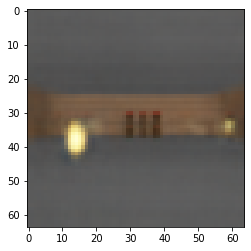

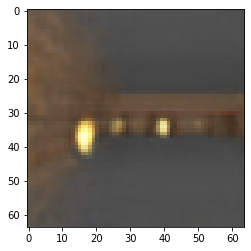

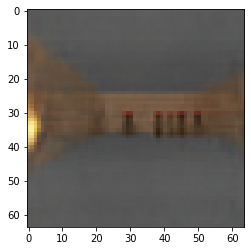

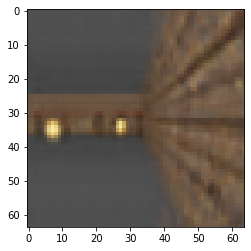

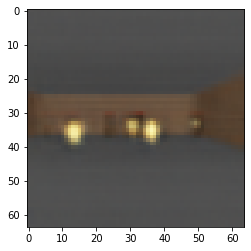

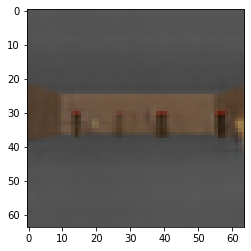

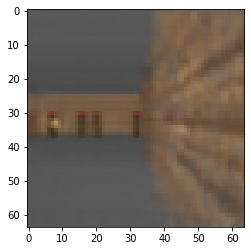

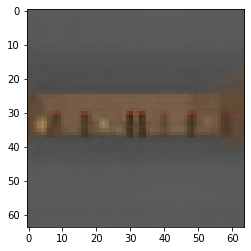

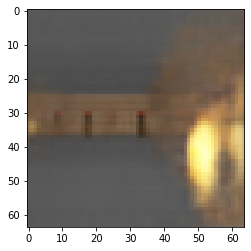

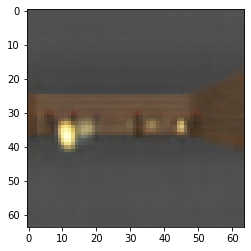

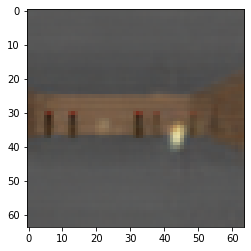

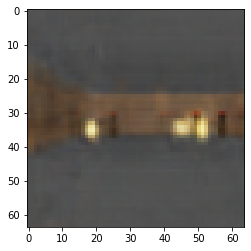

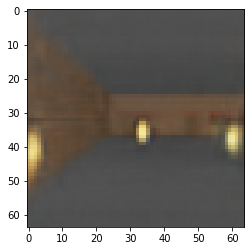

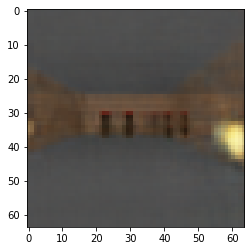

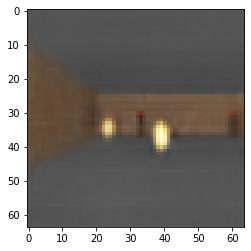

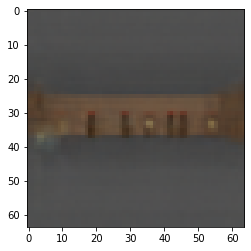

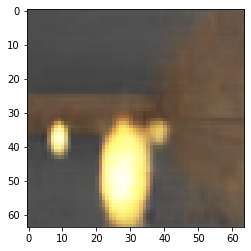

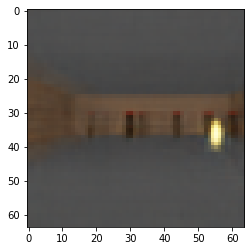

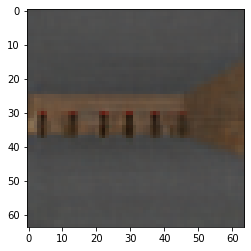

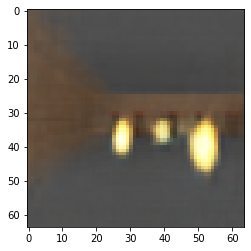

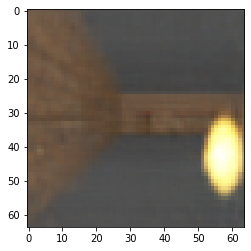

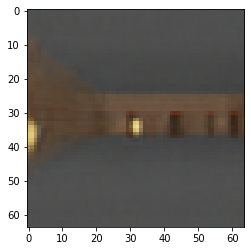

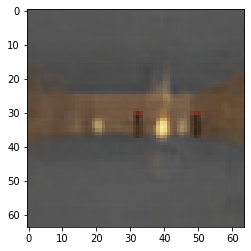

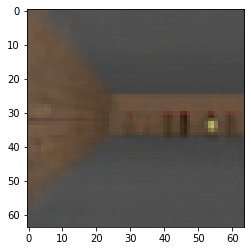

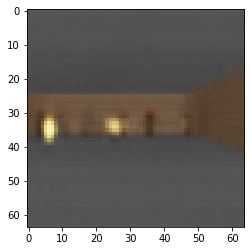

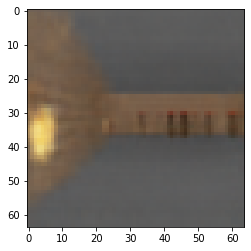

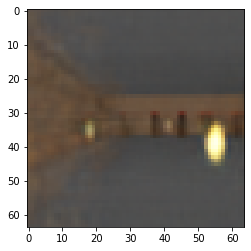

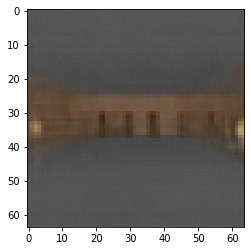

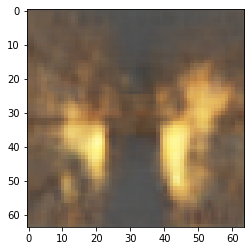

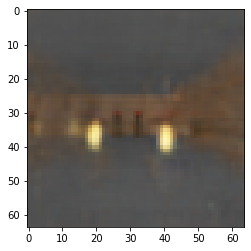

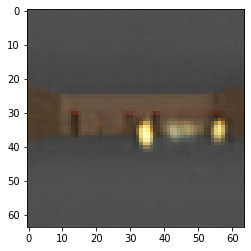

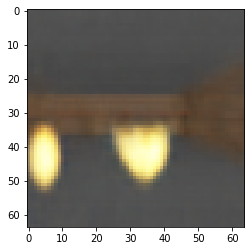

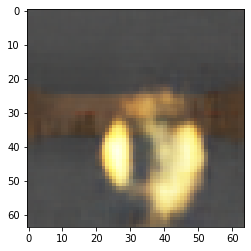

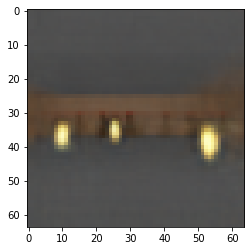

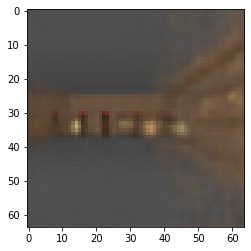

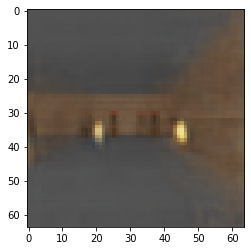

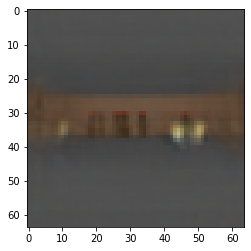

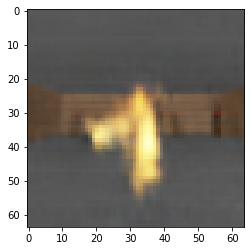

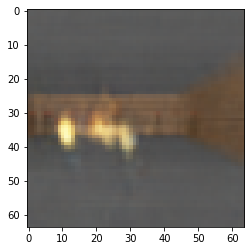

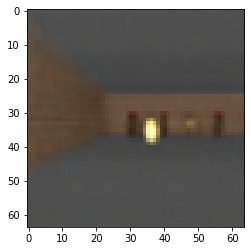

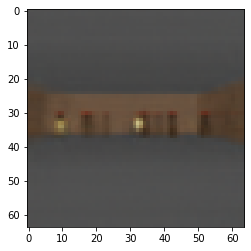

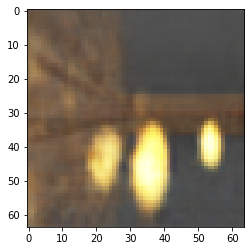

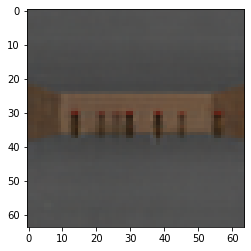

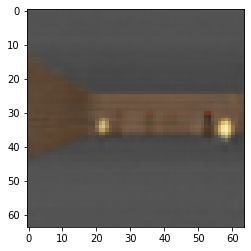

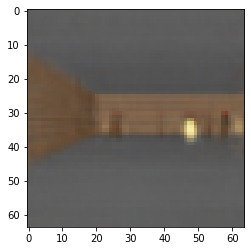

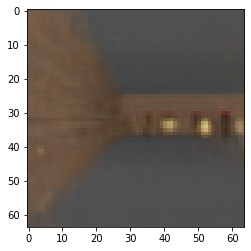

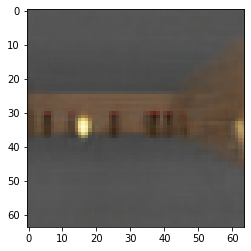

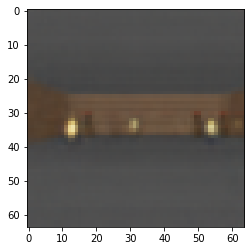

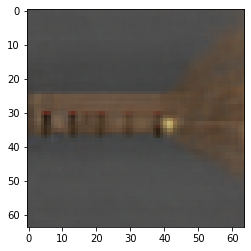

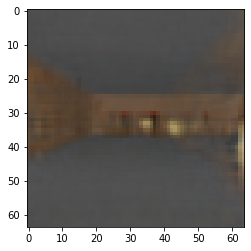

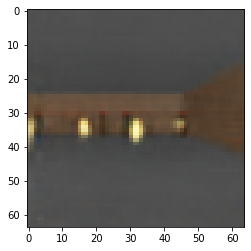

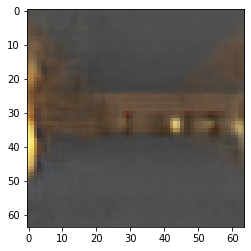

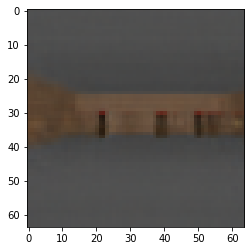

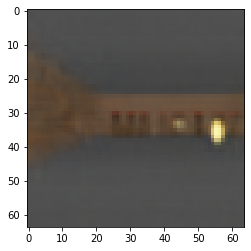

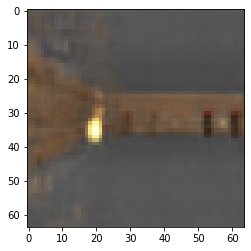

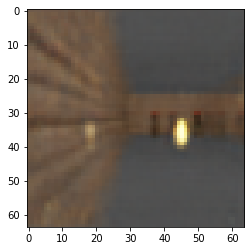

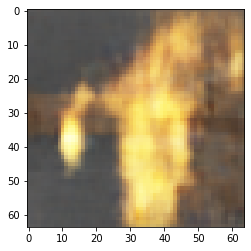

KeyboardInterrupt: 

In [10]:
#GIOCO NEL REAL ENV
i = 0
while 1:
    
    dec = vae.decode_latent_vec(batch_encoded_frames[0][0][i])
    img = vae.post_process_frame(dec)    
    imgplot = plt.imshow(img)
    plt.show()
    act = input()
    i+=1
    


Done:  False


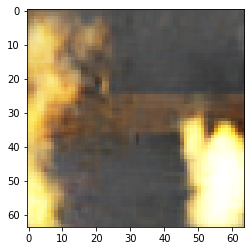


Done:  False


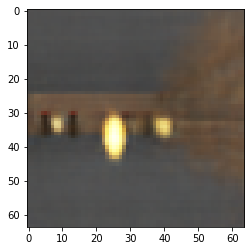


Done:  False


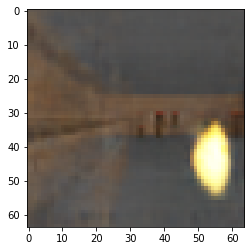


Done:  False


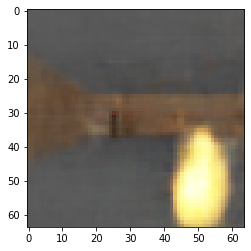


Done:  False


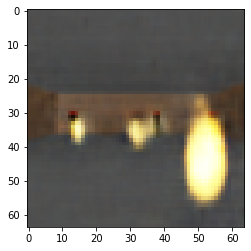


Done:  False


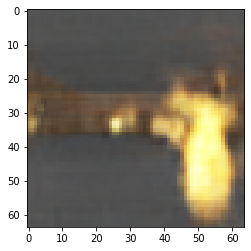


Done:  False


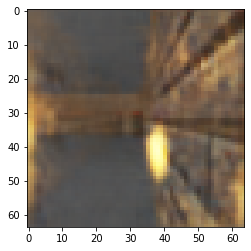


Done:  False


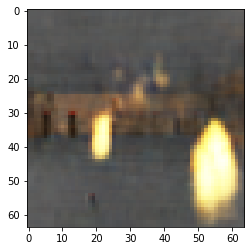


Done:  False


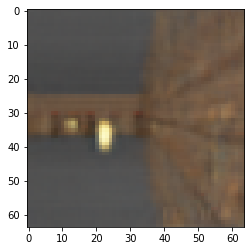


Done:  False


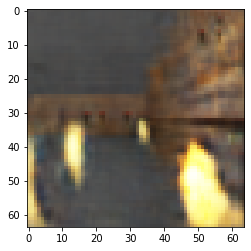


Done:  False


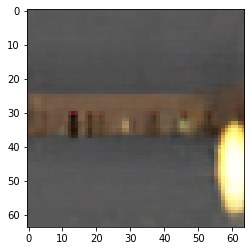


Done:  False


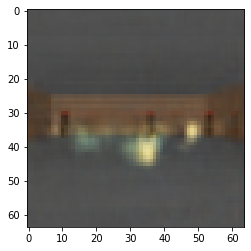


Done:  False


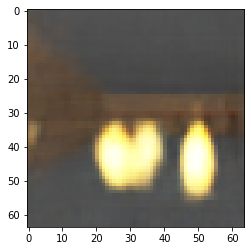


Done:  False


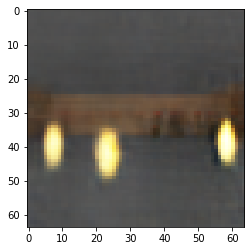


Done:  False


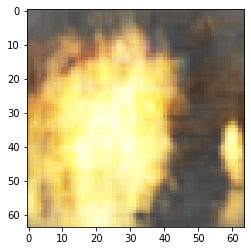


Done:  False


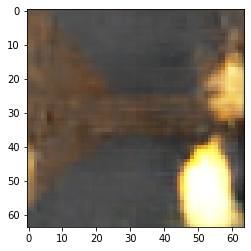


Done:  False


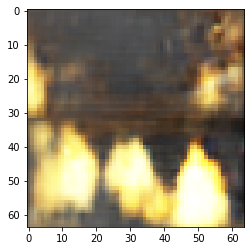


Done:  False


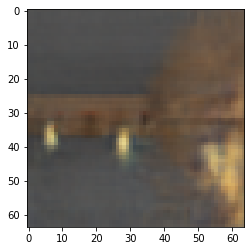


Done:  False


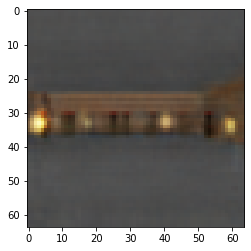


Done:  False


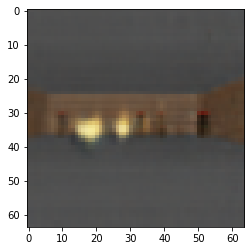


Done:  False


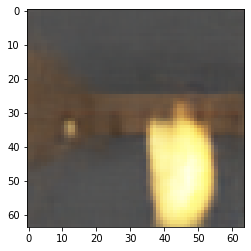


Done:  False


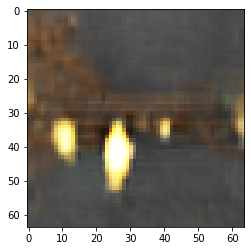


Done:  False


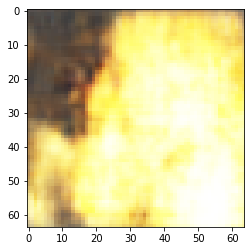


Done:  False


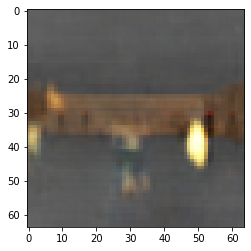


Done:  False


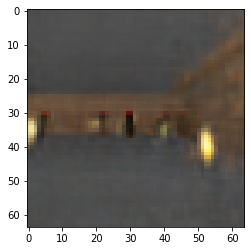


Done:  False


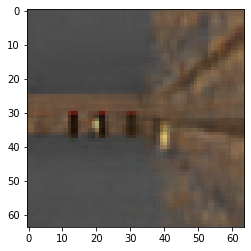


Done:  False


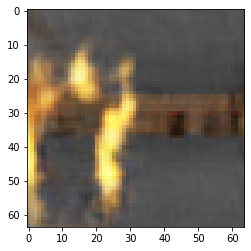


Done:  False


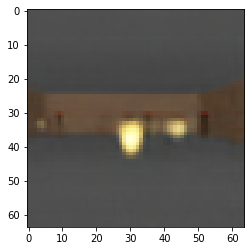


Done:  False


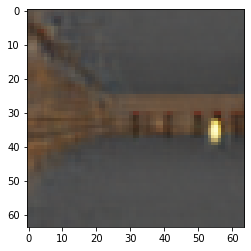


Done:  False


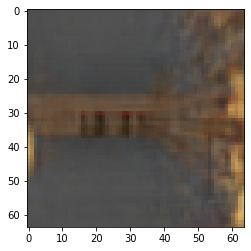


Done:  False


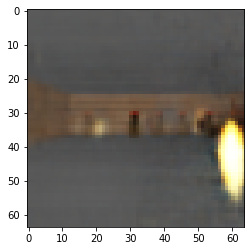


Done:  False


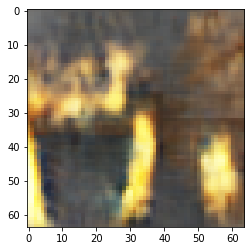


Done:  False


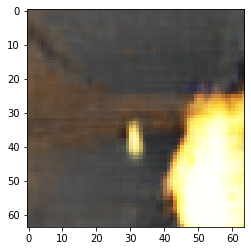


Done:  False


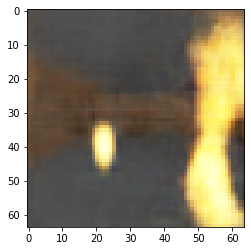


Done:  False


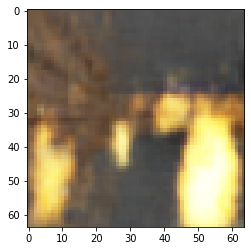


Done:  False


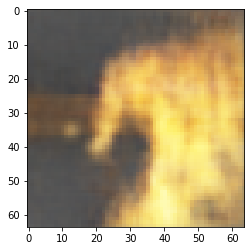


Done:  False


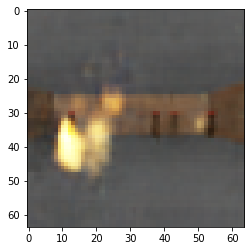

In [ ]:
#GIOCO NEL SIMULATED ENV
pesca_immagine = 134
learned_env.game(batch_encoded_frames[0][0][pesca_immagine])
